# Descripción del Dataset de Retrasos y Cancelaciones de Vuelos (2019)


##(20251Q) 82.04 - Analítica Descriptiva

### Alumnos:


*   Alumno 1
*   Alumno 2
*   Alumno 3


# Introducción  
El análisis y predicción de retrasos y cancelaciones en vuelos es fundamental para la industria aeronáutica, ya que impacta directamente en la experiencia del pasajero, la eficiencia operativa y los costos económicos de las aerolíneas. La capacidad de anticipar estos eventos permite a las compañías implementar medidas proactivas, optimizar recursos y mejorar la satisfacción de los clientes. Este trabajo se enfoca en explorar un conjunto de datos detallado sobre vuelos en 2019, con el objetivo de construir un modelo de clasificación que prediga si un vuelo sufrirá un retraso en su salida.

## Descripción del Problema  
Los retrasos y cancelaciones de vuelos representan un desafío operativo y financiero para las aerolíneas, generando pérdidas millonarias y afectando la reputación del sector. Factores como condiciones climáticas, congestión en aeropuertos o problemas técnicos influyen en estos eventos. Identificar patrones y variables críticas a través de datos históricos es clave para desarrollar modelos predictivos que ayuden a mitigar riesgos y mejorar la planificación. Este proyecto aborda el problema como una tarea de clasificación binaria (*retraso* vs. *no retraso*), aunque el dataset también permite expandirlo a un enfoque multiclase (ej. razones específicas de retraso o cancelación).

## Objetivo  
El objetivo principal es construir un modelo de clasificación que prediga con precisión si un vuelo se retrasará en su salida. Para lograrlo, se realizará:  

1. Un **análisis exploratorio (EDA)** de los datos, examinando variables como:  
   - Aerolíneas y aeropuertos (origen/destino).  
   - Condiciones climáticas (visibilidad, precipitación).  

2. La **evaluación de modelos** de clasificación (ej. regresión logística, Random Forest, XGBoost), comparando métricas como:  
   - Precisión, recall y F1-score.  
   - AUC-ROC para problemas desbalanceados.  

3. La identificación de **factores clave** que contribuyen a los retrasos, proporcionando insights accionables para la industria.

## Fuente de Datos  
El dataset utilizado fue obtenido de [Kaggle](https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations/data) y contiene información detallada de vuelos en 2019, incluyendo:  

- **Datos operativos**:  
  - Aerolínea, aeropuerto de origen/destino.  
  - Hora programada vs. real de salida.
  - Características de la tripulación.

- **Variables externas**:  
  - Condiciones meteorológicas (temperatura, viento, visibilidad).  
  - Datos macroeconómicos (empleo en el sector transporte).  

## Información del Dataset

Este dataset contiene información detallada de vuelos, condiciones meteorológicas, datos del aeropuerto y características de la aerolínea para el año 2019. Incluye datos mensuales y variables relacionadas con el clima y con la operación de los aeropuertos, y además permite realizar ajustes en el dataset, como agregar razones de cancelación y retrasos de llegada para problemas multicategoría.

| Característica                    | Descripción                                                                                                                                                                 |
|-----------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Clasificación del problema**    | Clasificación binaria (evaluando retraso en la salida)                                                                                                                      |
| **Total de registros**            | 6,489,062 registros                                                                                                                                                        |
| **Total de columnas**             | 26 columnas, que abarcan variables numéricas, categóricas y de tipo `float`                                                                                                |
| **Variables meteorológicas**      | Incluyen precipitaciones (PRCP), nieve (SNOW), cobertura de nieve (SNWD), temperatura máxima (TMAX), velocidad del viento (AWND)                                           |
| **Variables de aerolínea y vuelo**| Datos de cantidad de vuelos por mes, aerolínea, aeropuerto, segmento del vuelo, grupo de distancia, entre otros                                                            |
| **Variables de personal**         | Cantidad promedio de asistentes de vuelo por pasajero (FLT_ATTENDANTS_PER_PASS) y personal de tierra por pasajero (GROUND_SERV_PER_PASS)                                    |
| **Variables geográficas**         | Aeropuertos de origen y destino, latitud y longitud de los aeropuertos de salida                                                                                           |



El archivo original del dataset está disponible en Kaggle bajo el nombre [2019 Airline Delays and Cancellations](https://www.kaggle.com/datasets/threnjen/2019-airline-delays-and-cancellations/data).

### Notas Adicionales  
- **Cobertura climática**: Los datos meteorológicos incluyen solo el 90% de aeropuertos con mayor tráfico.  
- **Multiclase opcional**: Los archivos sin procesar permiten extender el análisis a predicción de razones de retraso (ej. clima, aerolínea).  
- **Sesgo potencial**: La ausencia de datos de vuelos regionales podría afectar la generalización del modelo.

## Hipótesis a Validar

Basándonos en el contexto aeronáutico, planteamos las siguientes hipótesis relacionadas con los retrasos en vuelos (`DEP_DEL15`):

1. **Hipótesis Climática**  
   "Los vuelos con condiciones meteorológicas adversas (precipitación > 1in, velocidad del viento > 15mph) tienen una probabilidad significativamente mayor de retraso."

2. **Hipótesis de Congestión**  
   "Los aeropuertos con mayor número de vuelos concurrentes (`CONCURRENT_FLIGHTS` percentil 90+) presentan tasas de retraso superiores a la media."

3. **Hipótesis de Antigüedad**  
   "La edad de los aviones (`PLANE_AGE` > 20 años) correlaciona positivamente con la frecuencia de retrasos por mantenimiento."

4. **Hipótesis Temporal**  
   "Existen patrones estacionales (meses de invierno) y horarios (turno tarde-noche) con incidencia significativamente mayor de retrasos."

## Importación de Librerías y Carga de Datos


In [ ]:
# Instalación de paquetes base
!pip install pandas scikit-learn numpy scipy matplotlib seaborn

# Para descargar datos de Google Drive
!pip install gdown

# Para manejo de datos desbalanceados
!pip install imbalanced-learn

# Paquetes adicionales (generalmente ya vienen con Colab)
!pip install --upgrade scikit-learn  # Para asegurar versión reciente

# Verificación de instalación
!pip list | grep -E "pandas|scikit|numpy|scipy|matplotlib|seaborn|gdown|imblearn"


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^
'grep' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import gdown
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import time
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
!pip install statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import statsmodels

In [ ]:
# Instalar XGBoost (para Gradient Boosting)
!pip install xgboost

# Instalar/actualizar scikit-learn (ya incluye los otros modelos)
!pip install --upgrade scikit-learn

# Verificación de versiones instaladas
!pip list | grep -E "xgboost|scikit-learn"


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
'grep' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
# Modelos
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [ ]:
def download_and_read_csv_from_google_drive(file_id):
    url = f"https://drive.google.com/uc?export=download&id={file_id}"
    csv_path = "./data.csv"

    # Descargar el archivo directamente usando gdown
    gdown.download(url, csv_path, quiet=False)

    # Leer el CSV descargado
    df = pd.read_csv(csv_path)
    return df

In [ ]:
# ID del archivo de Google Drive
file_id = "1O5ypX-pglcF8xUvYDOCa7kSPo0jVVTYW"

In [ ]:
# Descargar y leer el archivo CSV
df = download_and_read_csv_from_google_drive(file_id)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1O5ypX-pglcF8xUvYDOCa7kSPo0jVVTYW
From (redirected): https://drive.google.com/uc?export=download&id=1O5ypX-pglcF8xUvYDOCa7kSPo0jVVTYW&confirm=t&uuid=f334ef17-39fd-4883-84de-982d23196668
To: c:\Users\ext.jlopezsaez\Desktop\data.csv
100%|██████████| 1.37G/1.37G [00:53<00:00, 25.5MB/s]


## Exploración de Datos

In [ ]:
df.head()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,1,7,0,0800-0859,2,1,25,143,Southwest Airlines Co.,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
1,1,7,0,0700-0759,7,1,29,191,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
2,1,7,0,0600-0659,7,1,27,199,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
3,1,7,0,0600-0659,9,1,27,180,Delta Air Lines Inc.,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91
4,1,7,0,0001-0559,7,1,10,182,Spirit Air Lines,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,McCarran International,36.08,-115.152,NONE,0.0,0.0,0.0,65.0,2.91


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6489062 entries, 0 to 6489061
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   MONTH                          int64  
 1   DAY_OF_WEEK                    int64  
 2   DEP_DEL15                      int64  
 3   DEP_TIME_BLK                   object 
 4   DISTANCE_GROUP                 int64  
 5   SEGMENT_NUMBER                 int64  
 6   CONCURRENT_FLIGHTS             int64  
 7   NUMBER_OF_SEATS                int64  
 8   CARRIER_NAME                   object 
 9   AIRPORT_FLIGHTS_MONTH          int64  
 10  AIRLINE_FLIGHTS_MONTH          int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  int64  
 12  AVG_MONTHLY_PASS_AIRPORT       int64  
 13  AVG_MONTHLY_PASS_AIRLINE       int64  
 14  FLT_ATTENDANTS_PER_PASS        float64
 15  GROUND_SERV_PER_PASS           float64
 16  PLANE_AGE                      int64  
 17  DEPARTING_AIRPORT              object 
 18  LA

In [ ]:
# Resumen estadístico de las columnas numéricas
df.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06
mean,6.607062e+00,3.935598e+00,1.891441e-01,3.821102e+00,3.046890e+00,2.783675e+01,1.337397e+02,1.268458e+04,6.296058e+04,3.459251e+03,1.588639e+06,7.814970e+06,9.753707e-05,1.355612e-04,1.153211e+01,3.670581e+01,-9.425515e+01,1.037063e-01,3.159310e-02,9.152397e-02,7.146846e+01,8.341329e+00
std,3.396853e+00,1.995200e+00,3.916231e-01,2.382233e+00,1.757864e+00,2.151060e+01,4.645213e+01,8.839796e+03,3.438223e+04,4.251139e+03,1.123847e+06,5.046882e+06,8.644459e-05,4.649970e-05,6.935706e+00,5.500804e+00,1.790952e+01,3.432134e-01,3.170163e-01,7.281285e-01,1.835333e+01,3.607604e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,1.000000e+00,7.047600e+04,4.737940e+05,0.000000e+00,7.134695e-06,0.000000e+00,1.844000e+01,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00
25%,4.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.345000e+03,2.503400e+04,6.540000e+02,6.732210e+05,2.688839e+06,3.419267e-05,9.889412e-05,5.000000e+00,3.343600e+01,-1.063770e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00
50%,7.000000e+00,4.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.156200e+04,7.087800e+04,2.251000e+03,1.486066e+06,8.501631e+06,6.178236e-05,1.246511e-04,1.200000e+01,3.750500e+01,-8.790600e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00
75%,1.000000e+01,6.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,1.761500e+04,8.631200e+04,4.806000e+03,2.006675e+06,1.246018e+07,1.441659e-04,1.772872e-04,1.700000e+01,4.077900e+01,-8.093600e+01,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.029000e+01
max,1.200000e+01,7.000000e+00,1.000000e+00,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,3.525600e+04,1.177280e+05,2.183700e+04,4.365661e+06,1.338300e+07,3.484077e-04,2.289855e-04,3.200000e+01,6.116900e+01,-6.600200e+01,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01


## Análisis Exploratorio del DataFrame

### 📊 Descripción General
- **Registros:** 6,489,062 vuelos
- **Características:** 26 columnas  
Conjunto de datos masivo que registra información detallada de vuelos y condiciones aeroportuarias en 2019.

### 🧮 Tipos de Datos
| Categoría          | Cantidad | Ejemplos |
|--------------------|----------|----------|
| **Numéricas**      | 22       | `CONCURRENT_FLIGHTS`, `NUMBER_OF_SEATS` |
| **Categóricas**    | 4        | `CARRIER_NAME`, `DEPARTING_AIRPORT` |
| **Temporales**     | 0        | *(Nota: Solo `MONTH`/`DAY_OF_WEEK` como proxies)* |

### ✈️ Variables Clave de Operaciones

#### 1. Target Principal: Retrasos (`DEP_DEL15`)
- **Distribución:** 18.9% de vuelos con retraso >15 min  
*(Desequilibrio de clases relevante para el modelado)*

#### 2. Capacidad Operativa
| Variable               | Media  | Máximo | Interpretación |
|------------------------|--------|--------|----------------|
| `CONCURRENT_FLIGHTS`   | 27     | 109    | Alta congestión en hubs |
| `NUMBER_OF_SEATS`      | 133    | 337    | Dominio de aviones medianos |

#### 3. Indicadores de Tráfico
- `AIRPORT_FLIGHTS_MONTH`: Frecuencia por aeropuerto  
- `AIRLINE_AIRPORT_FLIGHTS_MONTH`: Rutas específicas  

*(Útiles para análisis de congestión)*

### 👥 Métricas de Pasajeros
| Indicador                         | Valor Medio |
|-----------------------------------|-------------|
| `AVG_MONTHLY_PASS_AIRPORT`        | 2.2M        |
| `AVG_MONTHLY_PASS_AIRLINE`        | 4.8M        |
| `FLT_ATTENDANTS_PER_PASS`         | 0.002       | *(≈1 asistente/500 pasajeros)* |

### ✈️ Estado de Flota
- **`PLANE_AGE`:**  
  - Media: 11.5 años  
  - Máximo: 32 años  

*(Posible correlación con retrasos por mantenimiento)*

### ⛅ Variables Climáticas Críticas
| Variable | Media  | Máximo | Impacto Potencial |
|----------|--------|--------|-------------------|
| `PRCP`   | 0.08   | 5.8    | Retrasos por lluvia |
| `SNOW`   | 0.02   | 17     | Cancelaciones invernales |
| `TMAX`   | 71.5°F | 115°F  | Estrés térmico |
| `AWND`   | 8.34   | 33.78  | Problemas en despegues |

**Hallazgo clave:**  
> El 80% de registros climáticos muestran valores nulos/minimos, pero los extremos (percentil 95+) podrían ser predictores fuertes de retrasos excepcionales.

---

**Notas para Análisis Posterior:**
1. Validar correlación entre `CONCURRENT_FLIGHTS` y `DEP_DEL15`
2. Estudiar interacción `PLANE_AGE` × `CARRIER_NAME`
3. Crear variable binaria para "clima extremo" (`SNOW` >5 o `AWND` >20)

# Análisis Exploratorio
Tomo un sample de los datos, dado que con +6M de registros se utiliza muchísima RAM

In [ ]:
# Muestreo estratificado (mantiene proporción de retrasos)
sample_size = 600000  # ~10% de los datos

#df_sample = df.groupby('DEP_DEL15', group_keys=False).apply(
#    lambda x: x.sample(int(sample_size * len(x) / len(df))))

df_sample = df.copy()

In [ ]:
df_sample.describe()

,MONTH,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,LATITUDE,LONGITUDE,PRCP,SNOW,SNWD,TMAX,AWND
count,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06,6.489062e+06
mean,6.607062e+00,3.935598e+00,1.891441e-01,3.821102e+00,3.046890e+00,2.783675e+01,1.337397e+02,1.268458e+04,6.296058e+04,3.459251e+03,1.588639e+06,7.814970e+06,9.753707e-05,1.355612e-04,1.153211e+01,3.670581e+01,-9.425515e+01,1.037063e-01,3.159310e-02,9.152397e-02,7.146846e+01,8.341329e+00
std,3.396853e+00,1.995200e+00,3.916231e-01,2.382233e+00,1.757864e+00,2.151060e+01,4.645213e+01,8.839796e+03,3.438223e+04,4.251139e+03,1.123847e+06,5.046882e+06,8.644459e-05,4.649970e-05,6.935706e+00,5.500804e+00,1.790952e+01,3.432134e-01,3.170163e-01,7.281285e-01,1.835333e+01,3.607604e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.400000e+01,1.100000e+03,5.582000e+03,1.000000e+00,7.047600e+04,4.737940e+05,0.000000e+00,7.134695e-06,0.000000e+00,1.844000e+01,-1.593460e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00
25%,4.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,1.100000e+01,9.000000e+01,5.345000e+03,2.503400e+04,6.540000e+02,6.732210e+05,2.688839e+06,3.419267e-05,9.889412e-05,5.000000e+00,3.343600e+01,-1.063770e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.900000e+01,5.820000e+00
50%,7.000000e+00,4.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,2.300000e+01,1.430000e+02,1.156200e+04,7.087800e+04,2.251000e+03,1.486066e+06,8.501631e+06,6.178236e-05,1.246511e-04,1.200000e+01,3.750500e+01,-8.790600e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.400000e+01,7.830000e+00
75%,1.000000e+01,6.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,3.900000e+01,1.720000e+02,1.761500e+04,8.631200e+04,4.806000e+03,2.006675e+06,1.246018e+07,1.441659e-04,1.772872e-04,1.700000e+01,4.077900e+01,-8.093600e+01,2.000000e-02,0.000000e+00,0.000000e+00,8.600000e+01,1.029000e+01
max,1.200000e+01,7.000000e+00,1.000000e+00,1.100000e+01,1.500000e+01,1.090000e+02,3.370000e+02,3.525600e+04,1.177280e+05,2.183700e+04,4.365661e+06,1.338300e+07,3.484077e-04,2.289855e-04,3.200000e+01,6.116900e+01,-6.600200e+01,1.163000e+01,1.720000e+01,2.520000e+01,1.150000e+02,3.378000e+01


### Análisis variables categóricas

In [ ]:
# Configurar estilo de los gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [ ]:
print(categorical_columns)

Index(['DEP_TIME_BLK', 'CARRIER_NAME', 'DEPARTING_AIRPORT',
       'PREVIOUS_AIRPORT'],
      dtype='object')



Análisis de la columna: DEP_TIME_BLK



,Category,Count
0,0800-0859,452391
1,0700-0759,436032
2,0600-0659,430404
3,1700-1759,408878
4,1200-1259,398009
5,1000-1059,397751
6,0900-0959,396112
7,1100-1159,394884
8,1500-1559,388240
9,1400-1459,375981


C:\Users\ext.jlopezsaez\AppData\Local\Temp\ipykernel_40984\1805564287.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, x='Category', y='Count', palette='viridis')


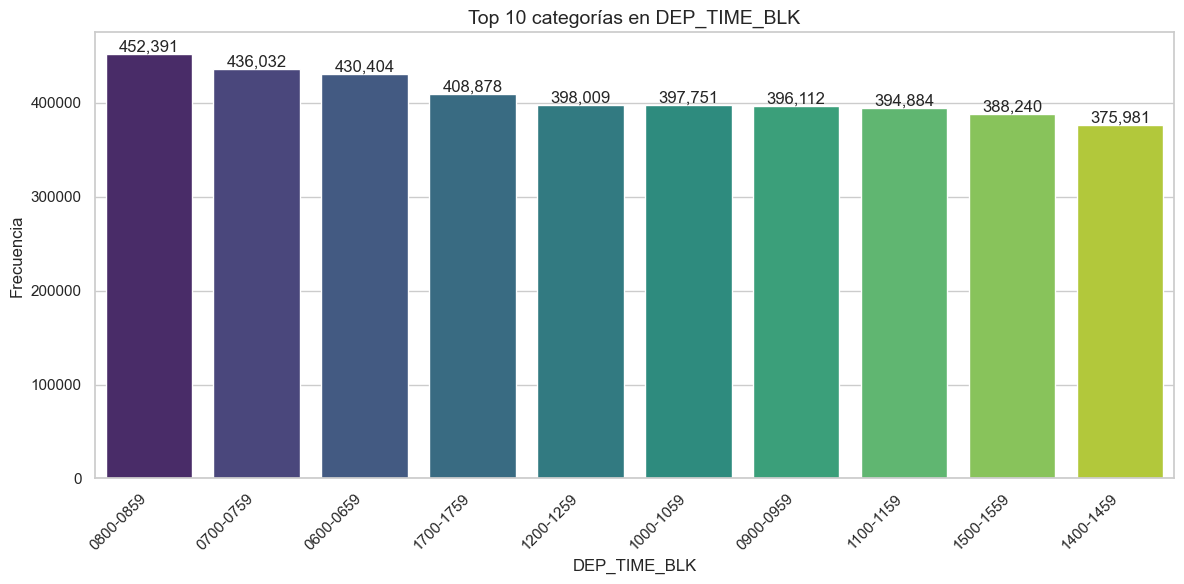


Estadísticas clave:
- Número de categorías únicas: 19
- Porcentaje de valores nulos: 0.0%
- Categoría más frecuente: '0800-0859' (452,391 registros)
- Representa el 6.97% del total



Análisis de la columna: CARRIER_NAME



,Category,Count
0,Southwest Airlines Co.,1296329
1,Delta Air Lines Inc.,938346
2,American Airlines Inc.,903640
3,United Air Lines Inc.,601044
4,SkyWest Airlines Inc.,584204
5,"Midwest Airline, Inc.",300154
6,JetBlue Airways,269596
7,Alaska Airlines Inc.,239337
8,American Eagle Airlines Inc.,228792
9,Comair Inc.,219324


C:\Users\ext.jlopezsaez\AppData\Local\Temp\ipykernel_40984\1805564287.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, x='Category', y='Count', palette='viridis')


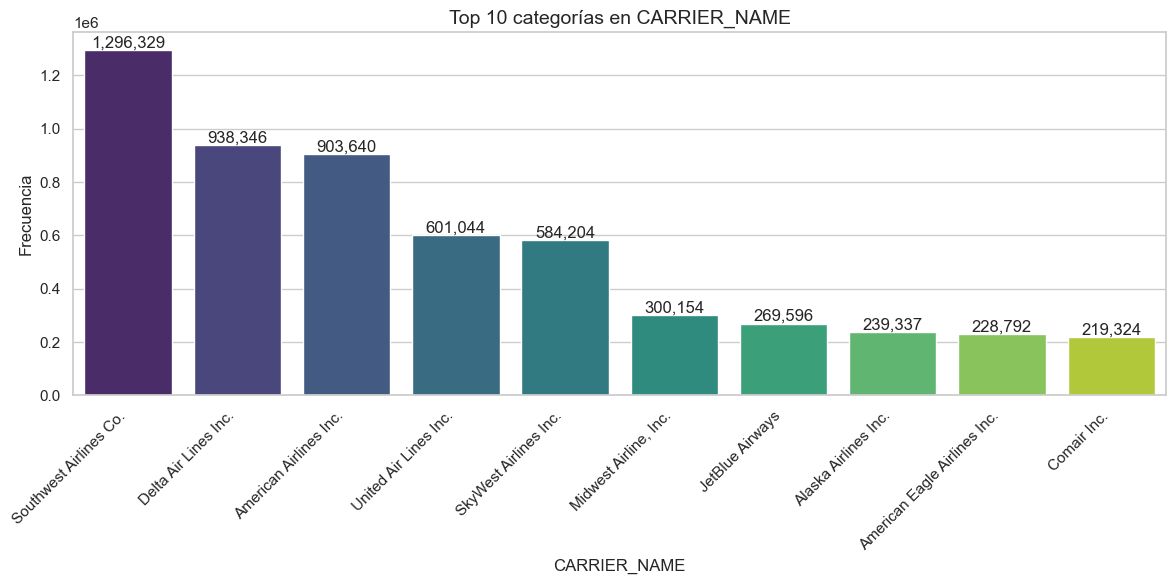


Estadísticas clave:
- Número de categorías únicas: 17
- Porcentaje de valores nulos: 0.0%
- Categoría más frecuente: 'Southwest Airlines Co.' (1,296,329 registros)
- Representa el 19.98% del total



Análisis de la columna: DEPARTING_AIRPORT



,Category,Count
0,Atlanta Municipal,392603
1,Chicago O'Hare International,329045
2,Dallas Fort Worth Regional,296449
3,Stapleton International,247175
4,Douglas Municipal,231855
5,Los Angeles International,217120
6,Houston Intercontinental,177108
7,Phoenix Sky Harbor International,172969
8,San Francisco International,167270
9,LaGuardia,166709


C:\Users\ext.jlopezsaez\AppData\Local\Temp\ipykernel_40984\1805564287.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, x='Category', y='Count', palette='viridis')


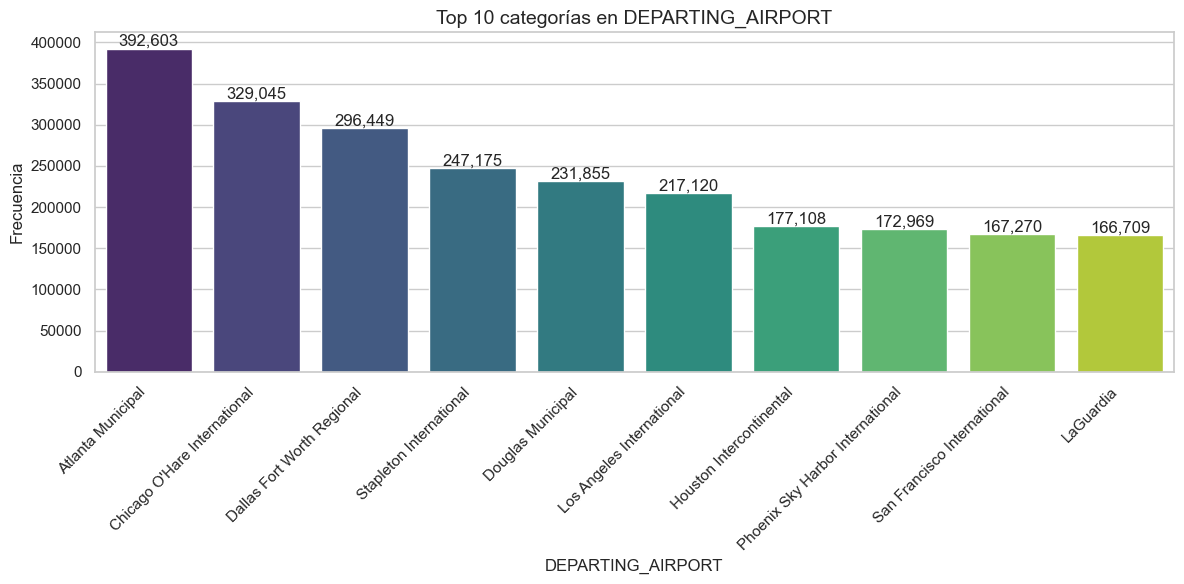


Estadísticas clave:
- Número de categorías únicas: 96
- Porcentaje de valores nulos: 0.0%
- Categoría más frecuente: 'Atlanta Municipal' (392,603 registros)
- Representa el 6.05% del total



Análisis de la columna: PREVIOUS_AIRPORT



,Category,Count
0,NONE,1449009
1,Atlanta Municipal,207340
2,Chicago O'Hare International,180403
3,Stapleton International,138214
4,Dallas Fort Worth Regional,134330
5,Los Angeles International,126992
6,Douglas Municipal,123960
7,LaGuardia,118711
8,Logan International,115770
9,Phoenix Sky Harbor International,108932


C:\Users\ext.jlopezsaez\AppData\Local\Temp\ipykernel_40984\1805564287.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, x='Category', y='Count', palette='viridis')


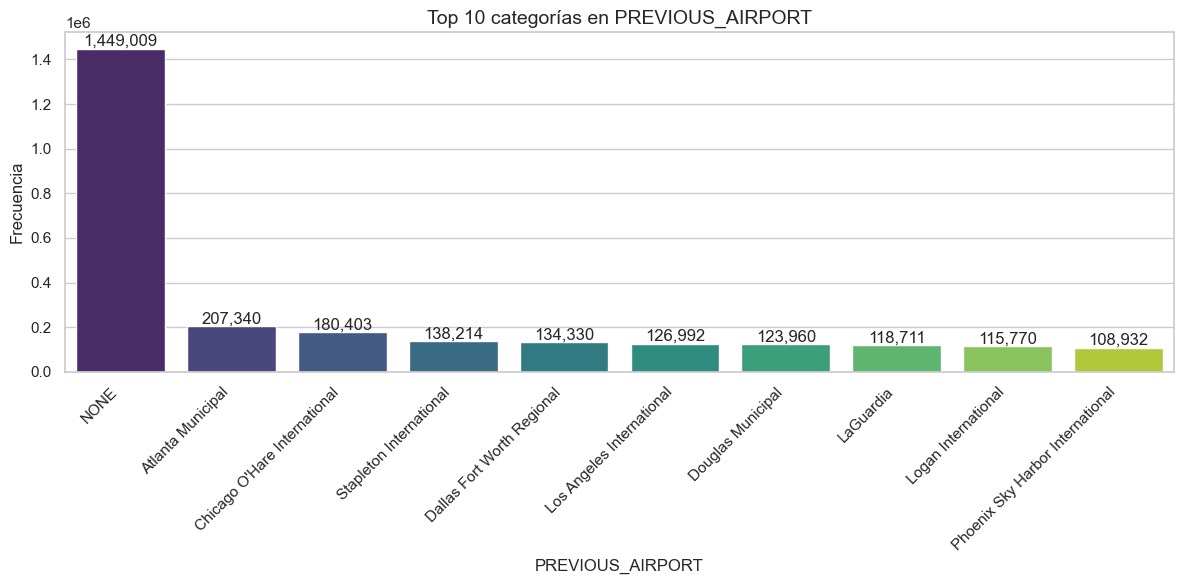


Estadísticas clave:
- Número de categorías únicas: 356
- Porcentaje de valores nulos: 0.0%
- Categoría más frecuente: 'NONE' (1,449,009 registros)
- Representa el 22.33% del total




In [ ]:
# Generar análisis para cada columna categórica
for col in categorical_columns:
    print(f"\n{'='*50}")
    print(f"Análisis de la columna: {col.upper()}")
    print(f"{'='*50}\n")

    # Tabla de frecuencias
    counts = df_sample[col].value_counts().reset_index()
    counts.columns = ['Category', 'Count']  # Standardize column names
    display(counts.head(10))

    # Gráfico de barras
    plt.figure(figsize=(12, 6))
    if len(counts) > 10:
        plot_data = counts.head(10)
        title = f'Top 10 categorías en {col}'
    else:
        plot_data = counts
        title = f'Distribución de {col}'

    ax = sns.barplot(data=plot_data, x='Category', y='Count', palette='viridis')
    plt.title(title, fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Añadir etiquetas de valor
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height()):,}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 5),
                   textcoords='offset points')

    plt.tight_layout()
    plt.show()

    # Estadísticas adicionales
    print(f"\nEstadísticas clave:")
    print(f"- Número de categorías únicas: {df_sample[col].nunique()}")
    print(f"- Porcentaje de valores nulos: {round(df_sample[col].isnull().mean()*100, 2)}%")
    print(f"- Categoría más frecuente: '{counts.iloc[0,0]}' ({counts.iloc[0,1]:,} registros)")
    print(f"- Representa el {round(counts.iloc[0,1]/len(df_sample)*100, 2)}% del total\n")
    print(f"{'='*100}\n")

### Análisis variables numéricas

In [ ]:
# Configurar estilo de los gráficos
sns.set(style="whitegrid")

In [ ]:
# Identificar columnas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
print(numerical_columns)

Index(['MONTH', 'DAY_OF_WEEK', 'DEP_DEL15', 'DISTANCE_GROUP', 'SEGMENT_NUMBER',
       'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH',
       'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
       'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE',
       'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE',
       'LATITUDE', 'LONGITUDE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND'],
      dtype='object')


In [ ]:
# Excluir coordenadas geográficas
exclude_geo = ['LATITUDE', 'LONGITUDE']
numerical_columns = [col for col in numerical_columns if col not in exclude_geo]

In [ ]:
# Clasificar en discretas y continuas
discrete_cols = ['MONTH', 'DAY_OF_WEEK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER', 'DEP_DEL15']
discrete_cols = [col for col in discrete_cols if col in numerical_columns]
continuous_cols = [col for col in numerical_columns if col not in discrete_cols]


ANÁLISIS DISCRETO: MONTH


,Valor,Count
0,1,502050
1,2,451439
2,3,554120
3,4,533687
4,5,558025
5,6,557027
6,7,578193
7,8,579532
8,9,529873
9,10,561327


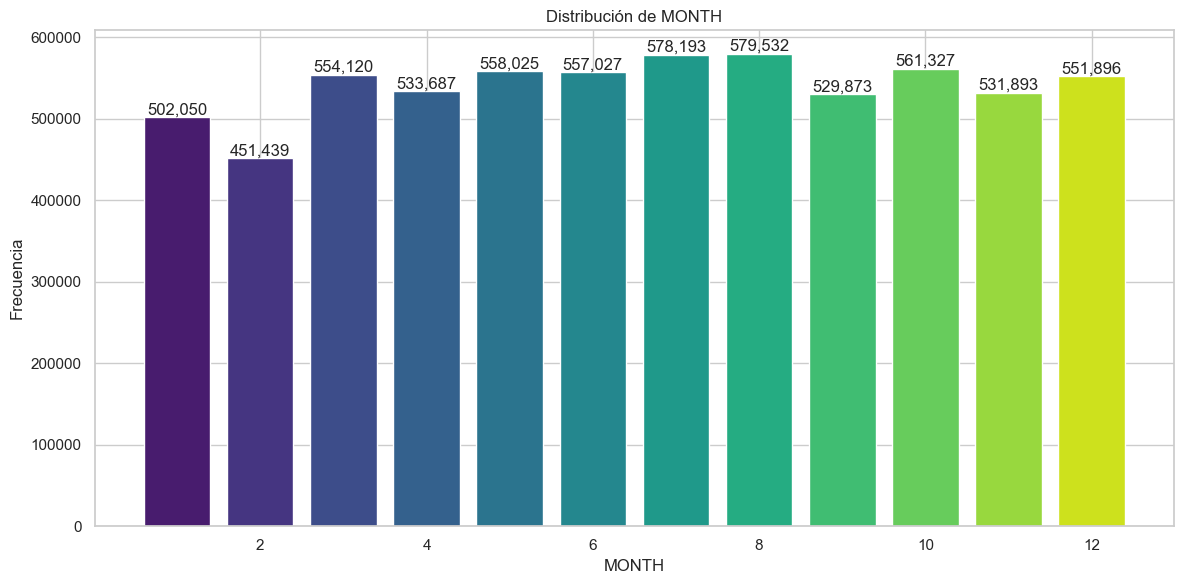


Estadísticas:
- Valores únicos: 12
- Rango: 1 a 12
- Moda: 8 (aparece 579,532 veces)



ANÁLISIS DISCRETO: DAY_OF_WEEK


,Valor,Count
0,1,967364
1,2,946470
2,3,938328
3,4,955682
4,5,969141
5,6,789918
6,7,922159


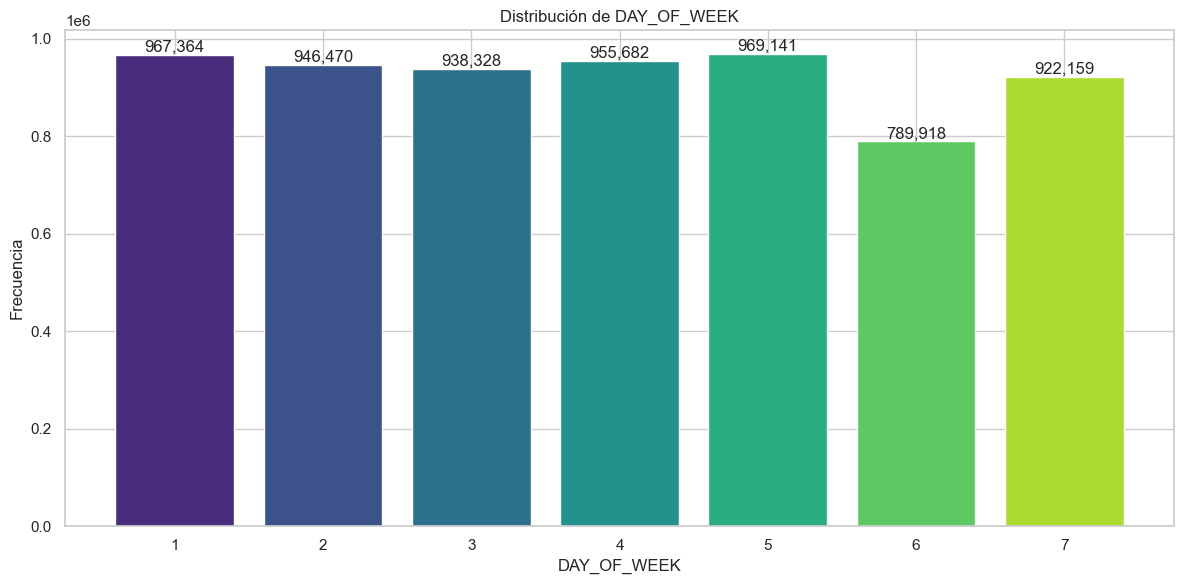


Estadísticas:
- Valores únicos: 7
- Rango: 1 a 7
- Moda: 5 (aparece 969,141 veces)



ANÁLISIS DISCRETO: DISTANCE_GROUP


,Valor,Count
0,1,717985
1,2,1547851
2,3,1315004
3,4,1029580
4,5,703113
5,6,300148
6,7,289456
7,8,155872
8,9,106898
9,10,188059


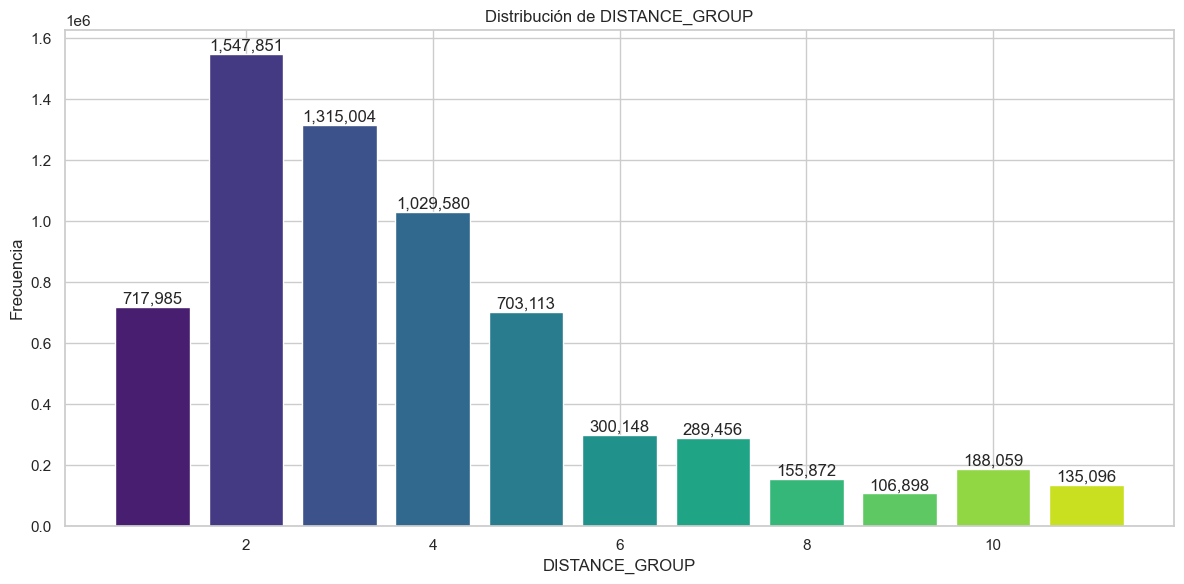


Estadísticas:
- Valores únicos: 11
- Rango: 1 a 11
- Moda: 2 (aparece 1,547,851 veces)



ANÁLISIS DISCRETO: SEGMENT_NUMBER


,Valor,Count
0,1,1449009
1,2,1505083
2,3,1182583
3,4,1062789
4,5,605609
5,6,446805
6,7,136254
7,8,79636
8,9,10151
9,10,4957


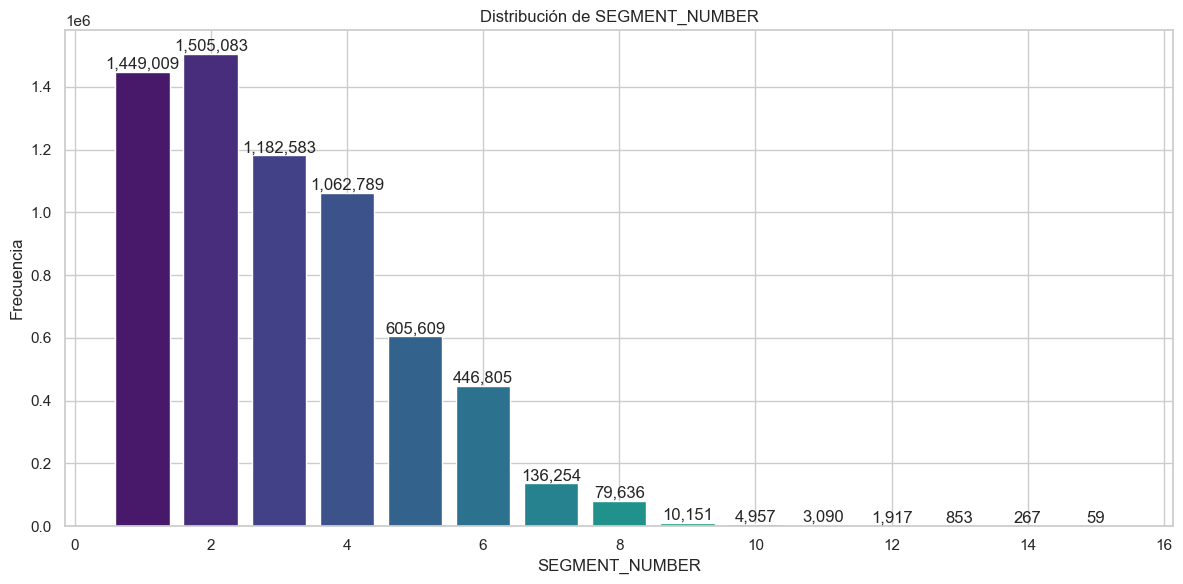


Estadísticas:
- Valores únicos: 15
- Rango: 1 a 15
- Moda: 2 (aparece 1,505,083 veces)



ANÁLISIS DISCRETO: DEP_DEL15


,Valor,Count
0,0,5261694
1,1,1227368


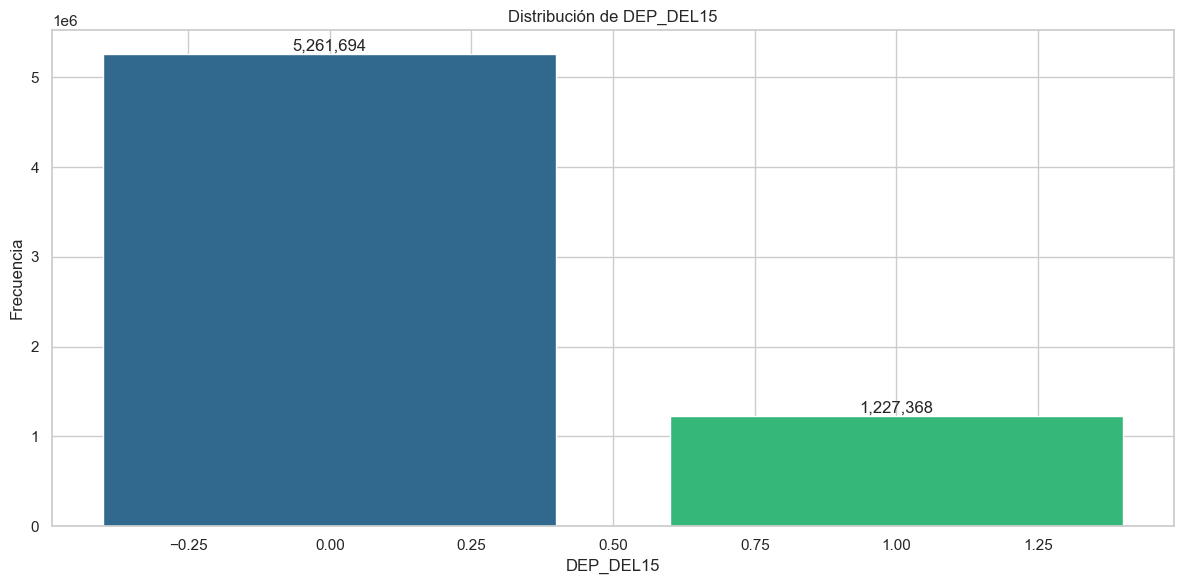


Estadísticas:
- Valores únicos: 2
- Rango: 0 a 1
- Moda: 0 (aparece 5,261,694 veces)




In [ ]:
# Análisis para variables discretas (como categóricas)
for col in discrete_cols:
    print(f"\n{'='*50}")
    print(f"ANÁLISIS DISCRETO: {col.upper()}")
    print(f"{'='*50}")

    # Frecuencias
    counts = df_sample[col].value_counts().sort_index().reset_index()
    counts.columns = ['Valor', 'Count']
    display(counts)

    # Gráfico de barras
    plt.figure(figsize=(12, 6))
    bars = plt.bar(counts['Valor'], counts['Count'], color=sns.color_palette("viridis", len(counts)))

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    # Etiquetas
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Estadísticas
    print(f"\nEstadísticas:")
    print(f"- Valores únicos: {df_sample[col].nunique()}")
    print(f"- Rango: {df_sample[col].min()} a {df_sample[col].max()}")
    print(f"- Moda: {df_sample[col].mode()[0]} (aparece {counts['Count'].max():,} veces)")
    print(f"\n{'='*100}\n")


ANÁLISIS CONTINUO: CONCURRENT_FLIGHTS


,count,mean,std,min,25%,50%,75%,max
CONCURRENT_FLIGHTS,6489062.0,27.836752,21.510599,1.0,11.0,23.0,39.0,109.0


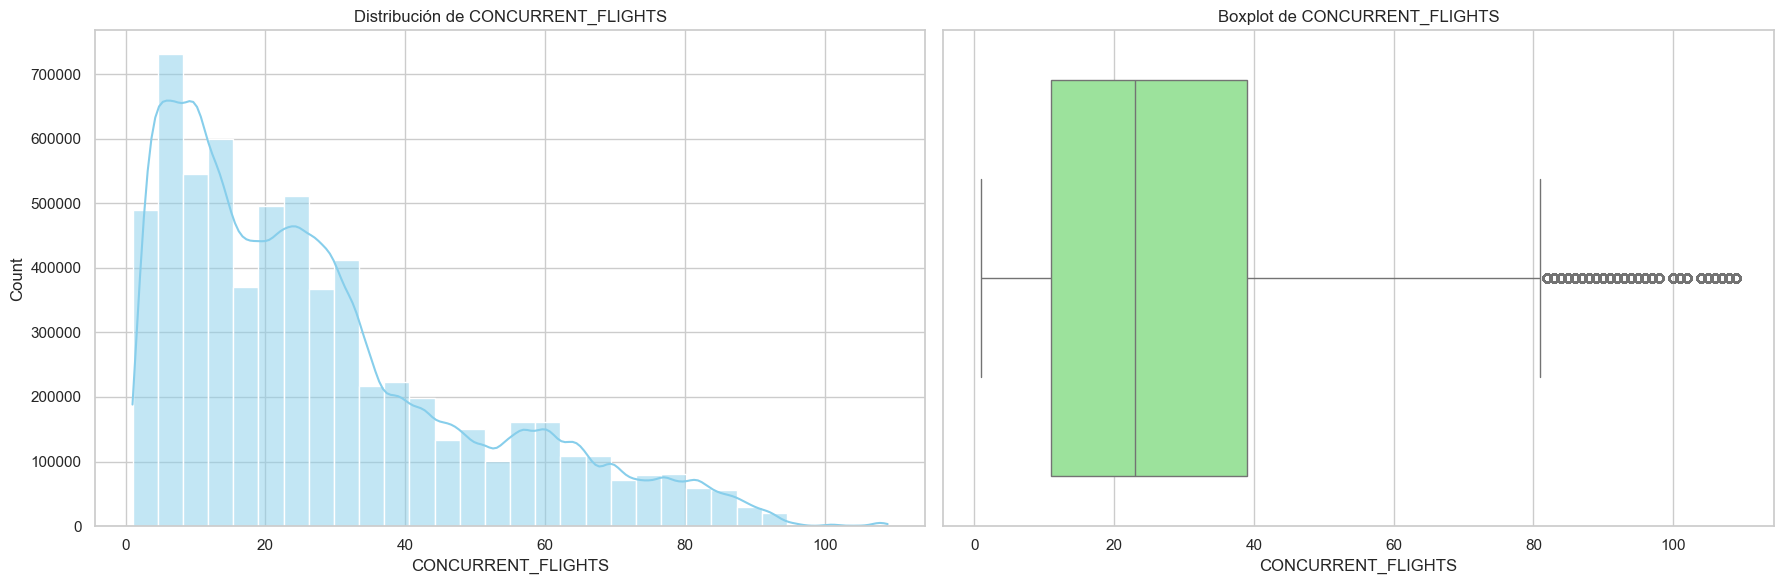


Outliers (IQR: 28.00):
- Valores < -31.00 o > 81.00
- Representan 2.4% de los datos



ANÁLISIS CONTINUO: NUMBER_OF_SEATS


,count,mean,std,min,25%,50%,75%,max
NUMBER_OF_SEATS,6489062.0,133.739739,46.452126,44.0,90.0,143.0,172.0,337.0


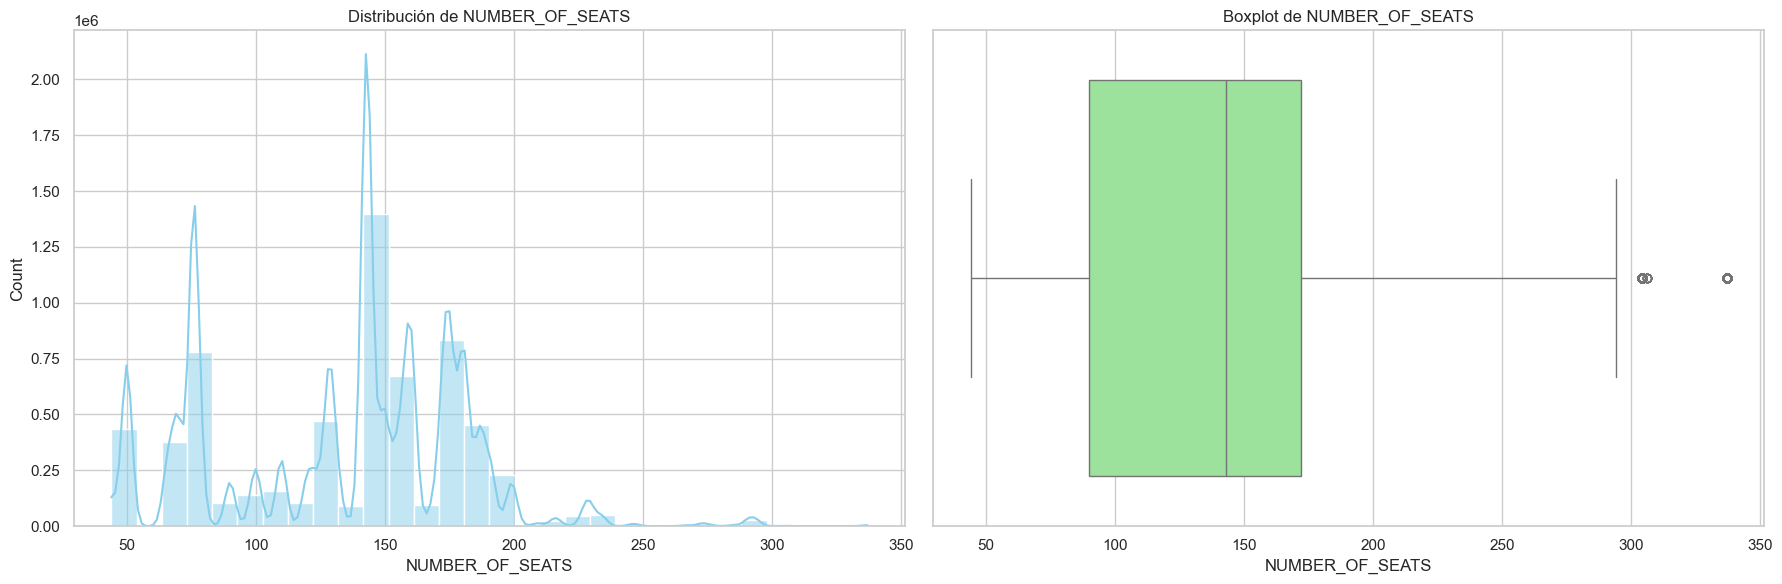


Outliers (IQR: 82.00):
- Valores < -33.00 o > 295.00
- Representan 0.0% de los datos



ANÁLISIS CONTINUO: AIRPORT_FLIGHTS_MONTH


,count,mean,std,min,25%,50%,75%,max
AIRPORT_FLIGHTS_MONTH,6489062.0,12684.580729,8839.795887,1100.0,5345.0,11562.0,17615.0,35256.0


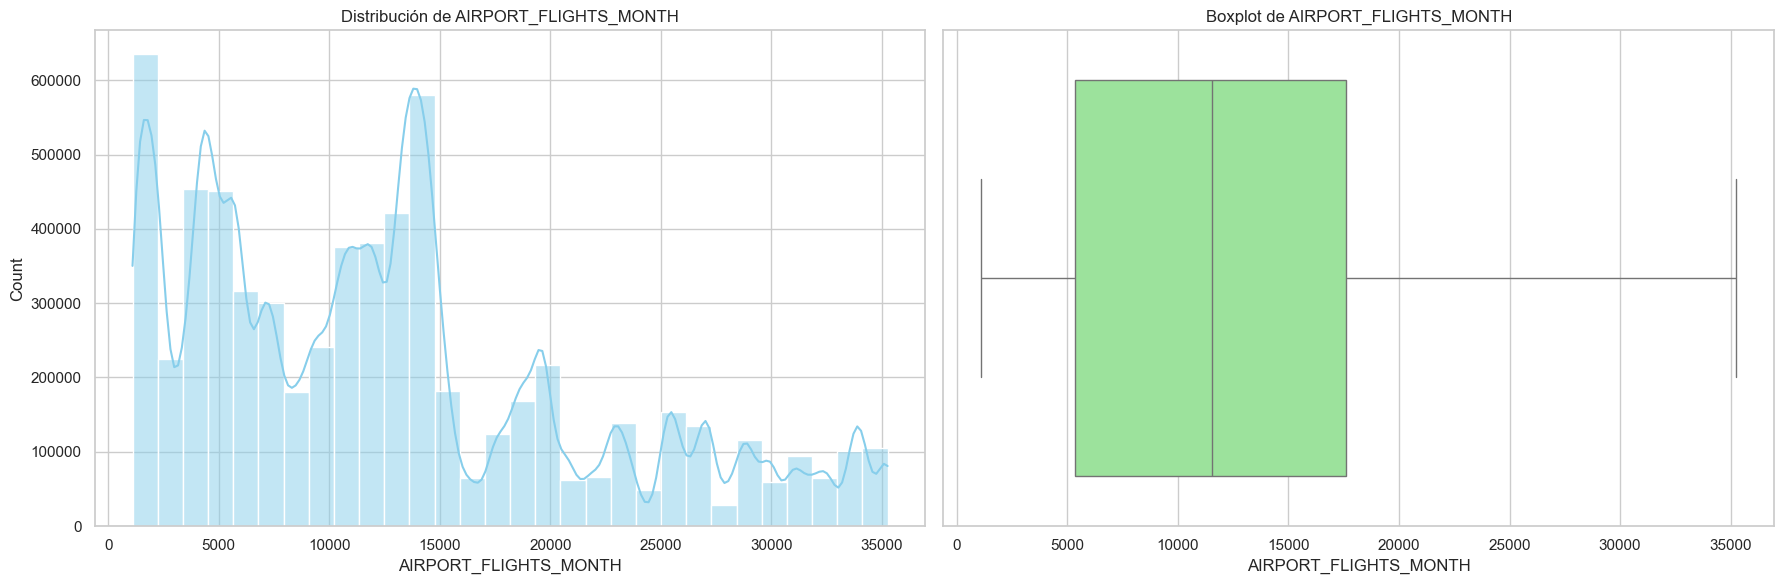


Outliers (IQR: 12270.00):
- Valores < -13060.00 o > 36020.00
- Representan 0.0% de los datos



ANÁLISIS CONTINUO: AIRLINE_FLIGHTS_MONTH


,count,mean,std,min,25%,50%,75%,max
AIRLINE_FLIGHTS_MONTH,6489062.0,62960.575989,34382.22901,5582.0,25034.0,70878.0,86312.0,117728.0


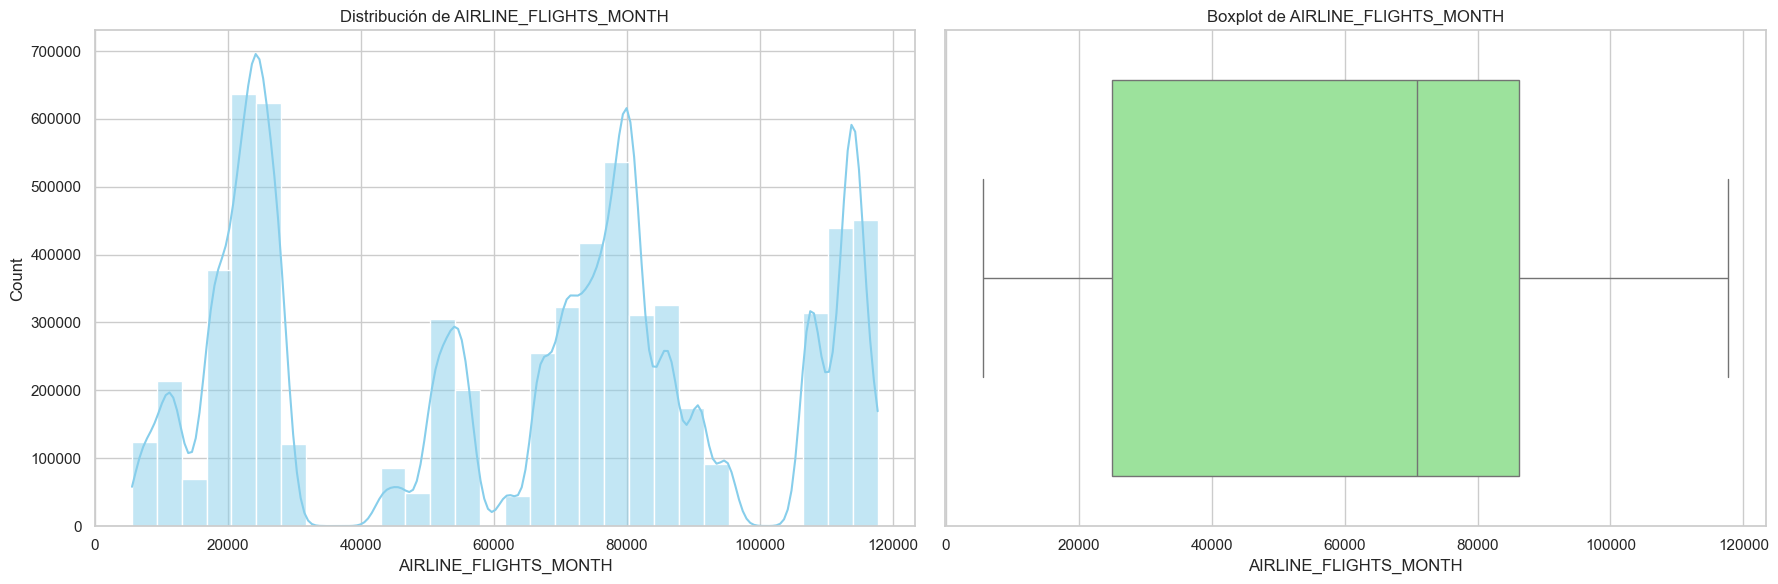


Outliers (IQR: 61278.00):
- Valores < -66883.00 o > 178229.00
- Representan 0.0% de los datos



ANÁLISIS CONTINUO: AIRLINE_AIRPORT_FLIGHTS_MONTH


,count,mean,std,min,25%,50%,75%,max
AIRLINE_AIRPORT_FLIGHTS_MONTH,6489062.0,3459.251436,4251.139427,1.0,654.0,2251.0,4806.0,21837.0


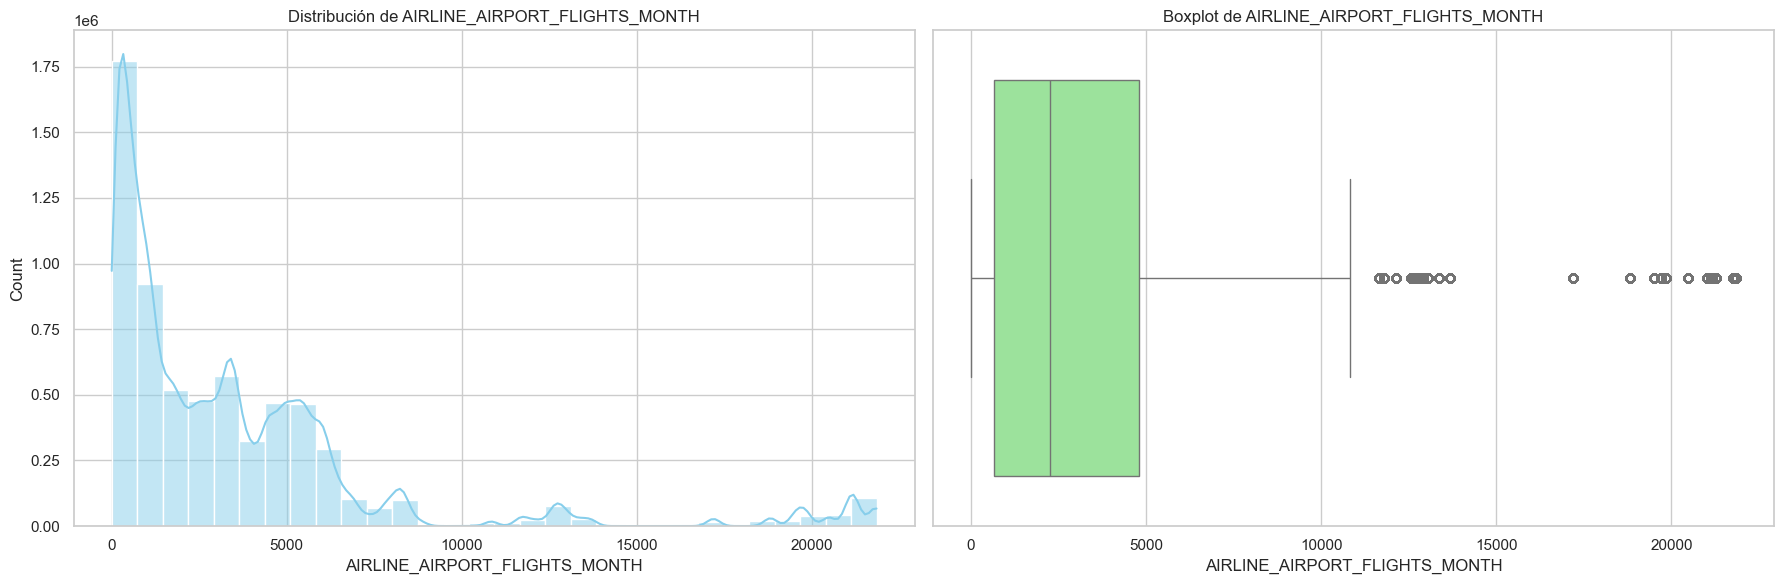


Outliers (IQR: 4152.00):
- Valores < -5574.00 o > 11034.00
- Representan 5.9% de los datos



ANÁLISIS CONTINUO: AVG_MONTHLY_PASS_AIRPORT


,count,mean,std,min,25%,50%,75%,max
AVG_MONTHLY_PASS_AIRPORT,6489062.0,1.588639e+06,1.123847e+06,70476.0,673221.0,1486066.0,2006675.0,4365661.0


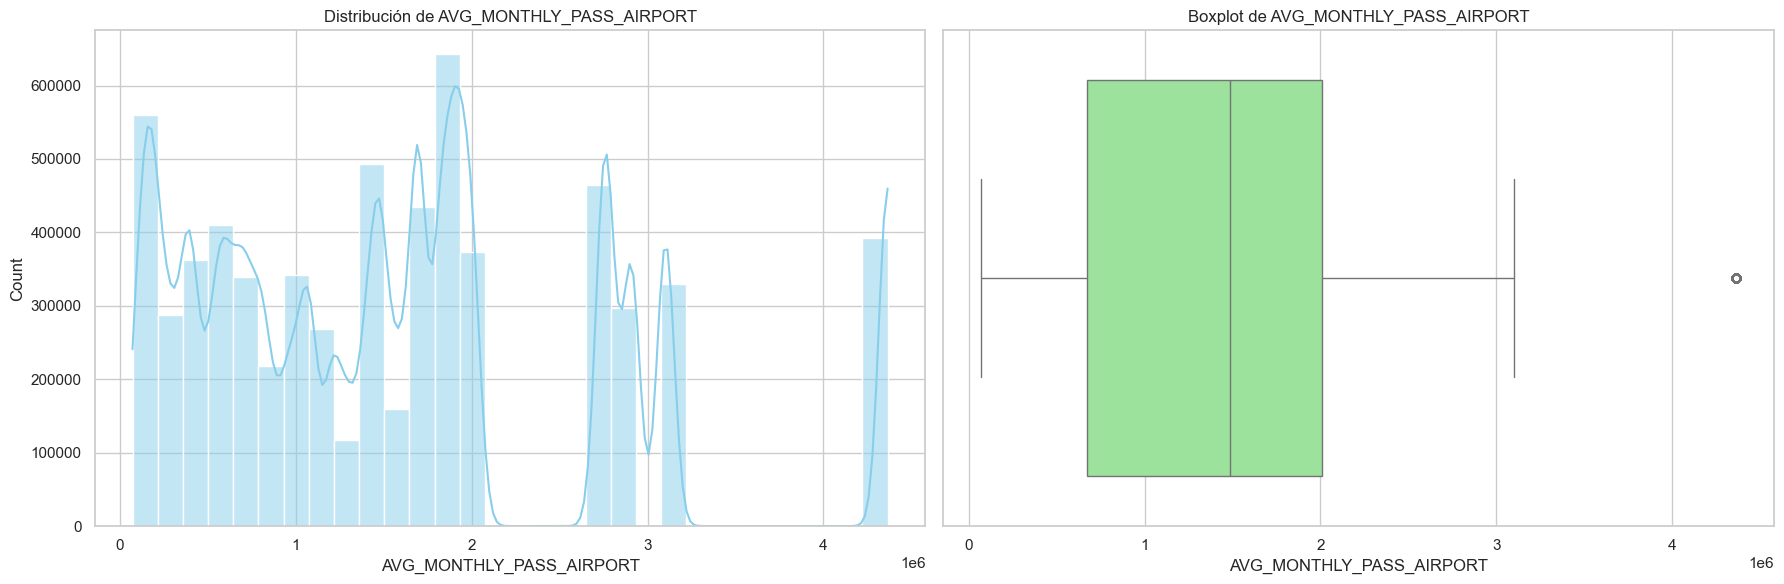


Outliers (IQR: 1333454.00):
- Valores < -1326960.00 o > 4006856.00
- Representan 6.1% de los datos



ANÁLISIS CONTINUO: AVG_MONTHLY_PASS_AIRLINE


,count,mean,std,min,25%,50%,75%,max
AVG_MONTHLY_PASS_AIRLINE,6489062.0,7.814970e+06,5.046882e+06,473794.0,2688839.0,8501631.0,12460183.0,13382999.0


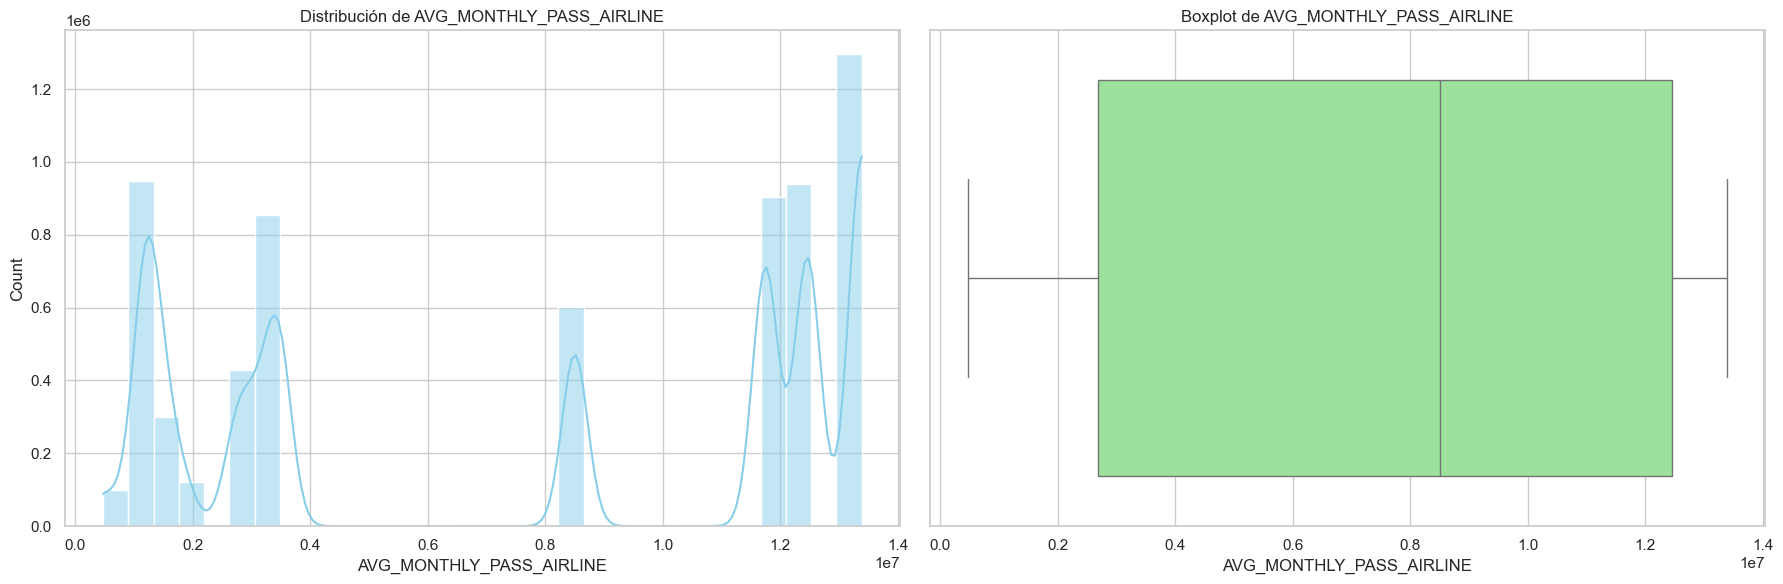


Outliers (IQR: 9771344.00):
- Valores < -11968177.00 o > 27117199.00
- Representan 0.0% de los datos



ANÁLISIS CONTINUO: FLT_ATTENDANTS_PER_PASS


,count,mean,std,min,25%,50%,75%,max
FLT_ATTENDANTS_PER_PASS,6489062.0,0.000098,0.000086,0.0,0.000034,0.000062,0.000144,0.000348


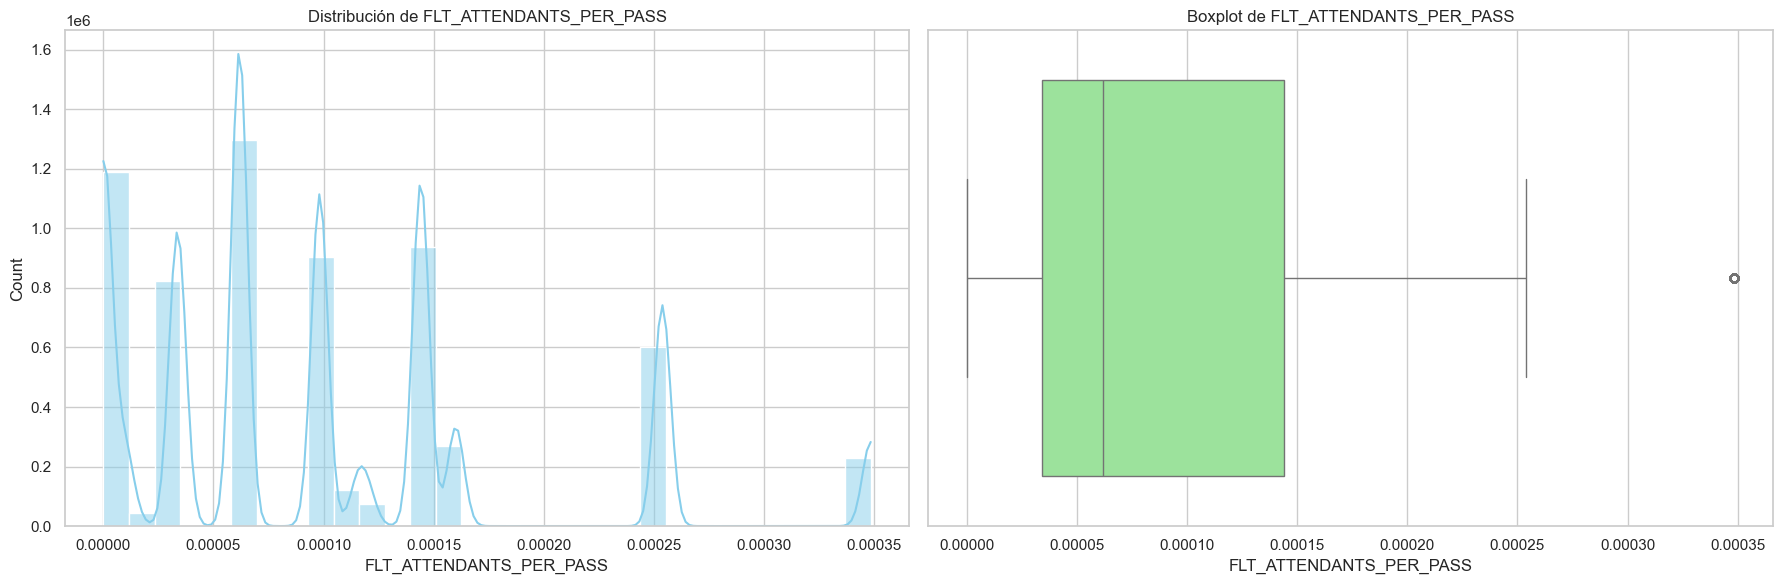


Outliers (IQR: 0.00):
- Valores < -0.00 o > 0.00
- Representan 3.5% de los datos



ANÁLISIS CONTINUO: GROUND_SERV_PER_PASS


,count,mean,std,min,25%,50%,75%,max
GROUND_SERV_PER_PASS,6489062.0,0.000136,0.000046,0.000007,0.000099,0.000125,0.000177,0.000229


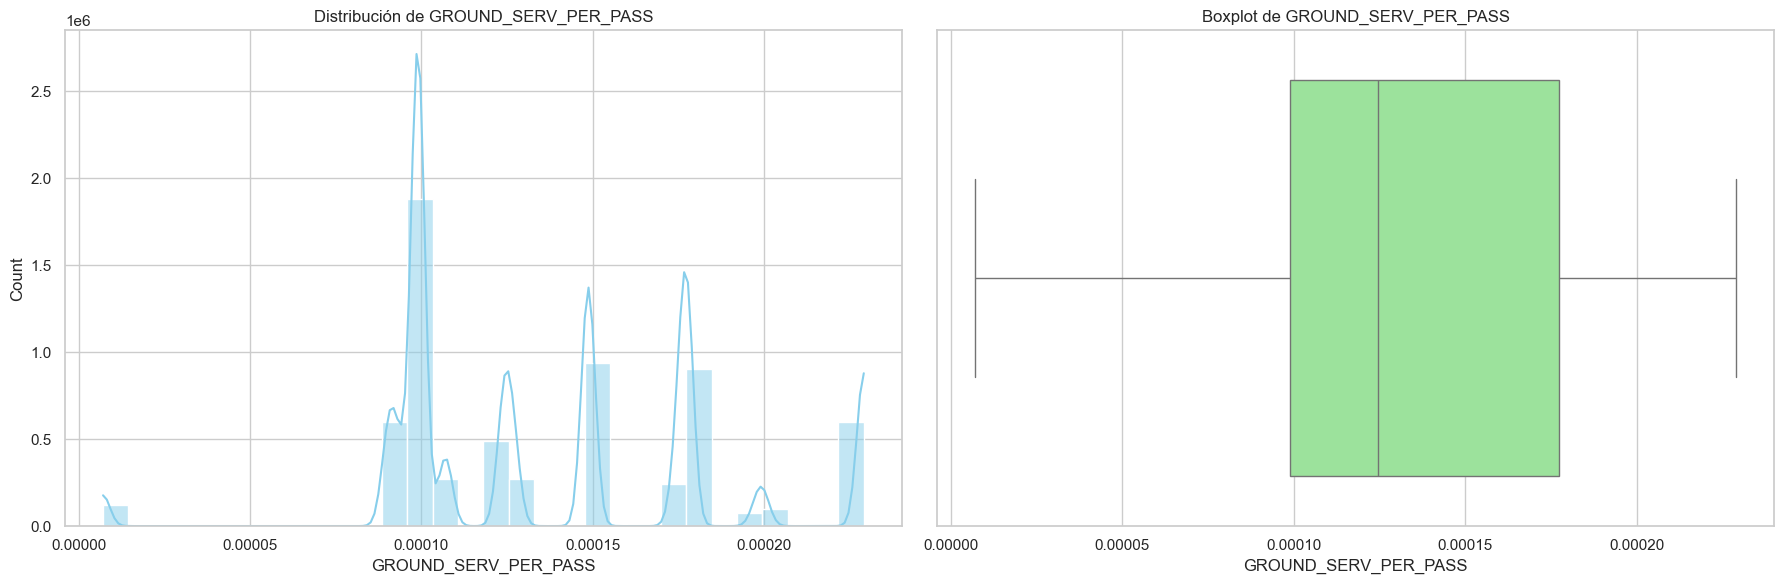


Outliers (IQR: 0.00):
- Valores < -0.00 o > 0.00
- Representan 0.0% de los datos



ANÁLISIS CONTINUO: PLANE_AGE


,count,mean,std,min,25%,50%,75%,max
PLANE_AGE,6489062.0,11.532108,6.935706,0.0,5.0,12.0,17.0,32.0


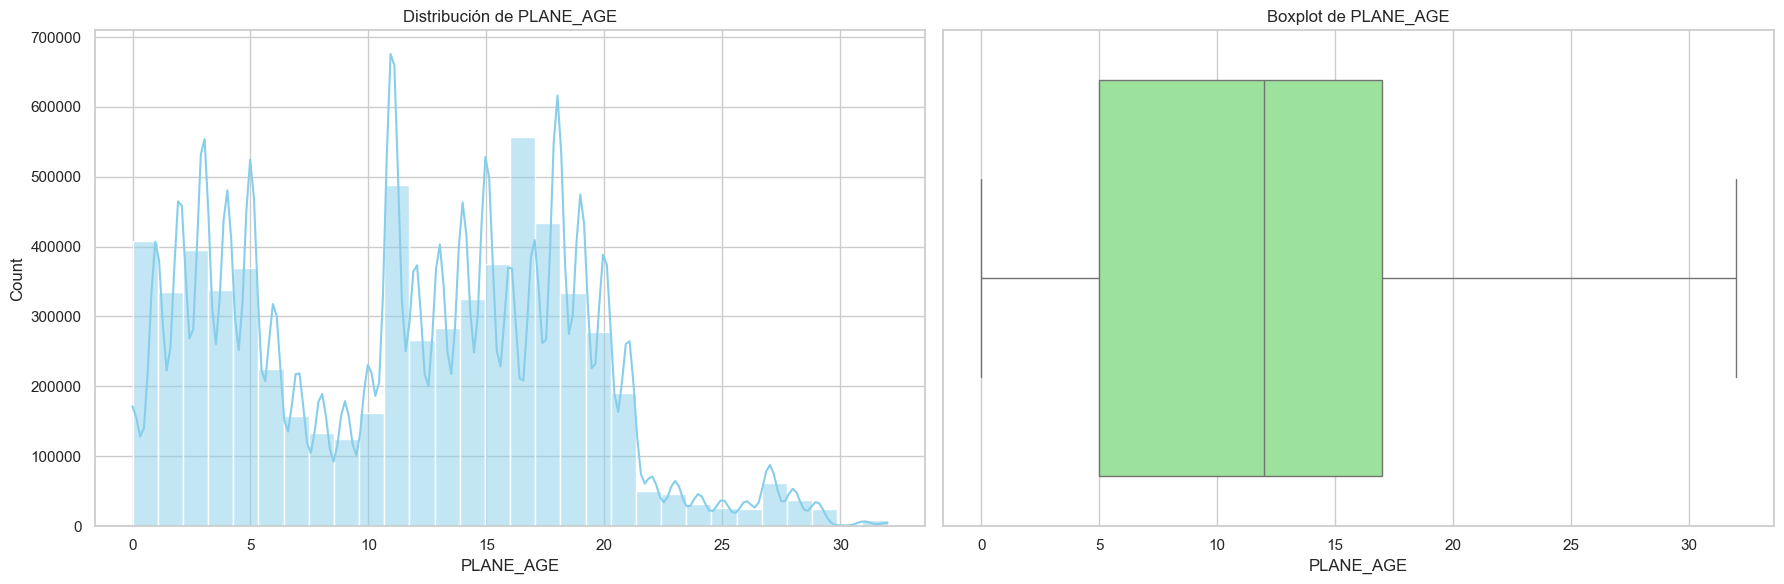


Outliers (IQR: 12.00):
- Valores < -13.00 o > 35.00
- Representan 0.0% de los datos



ANÁLISIS CONTINUO: PRCP


,count,mean,std,min,25%,50%,75%,max
PRCP,6489062.0,0.103706,0.343213,0.0,0.0,0.0,0.02,11.63


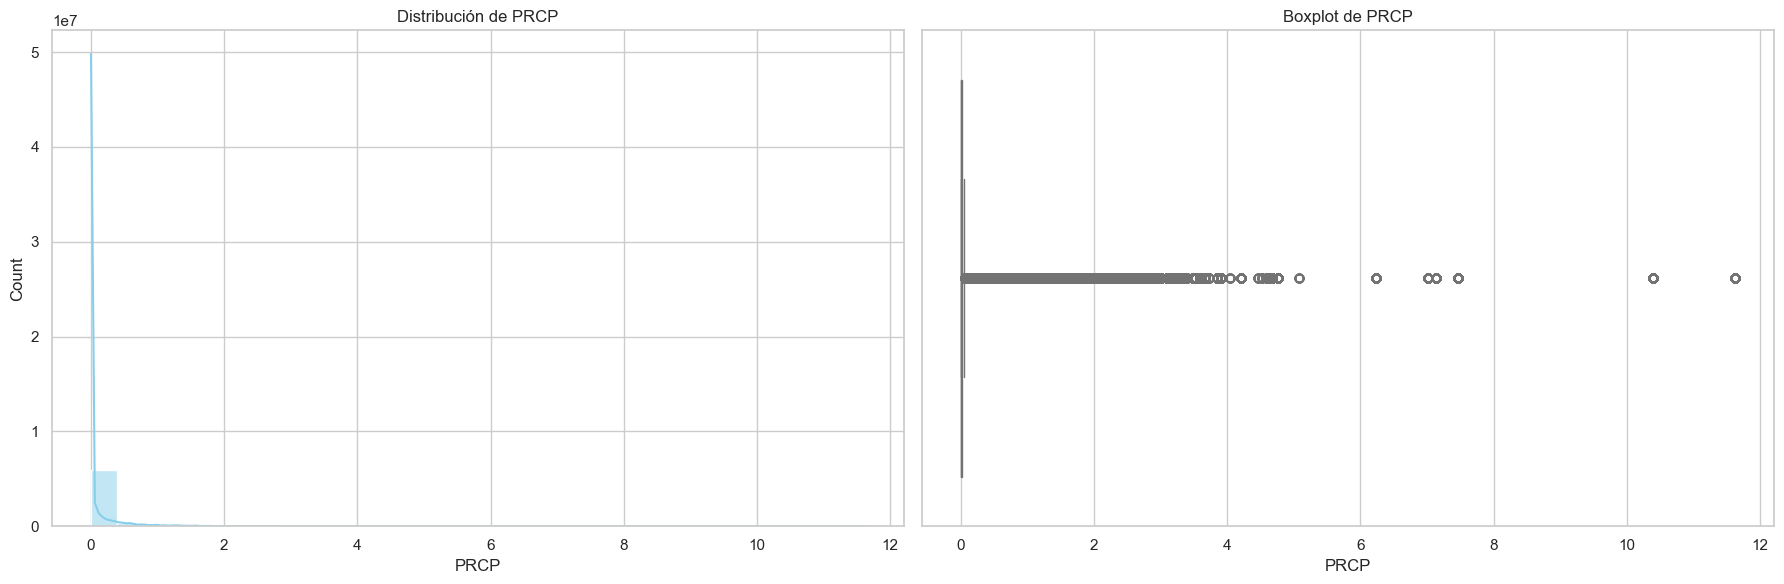


Outliers (IQR: 0.02):
- Valores < -0.03 o > 0.05
- Representan 20.8% de los datos



ANÁLISIS CONTINUO: SNOW


,count,mean,std,min,25%,50%,75%,max
SNOW,6489062.0,0.031593,0.317016,0.0,0.0,0.0,0.0,17.2


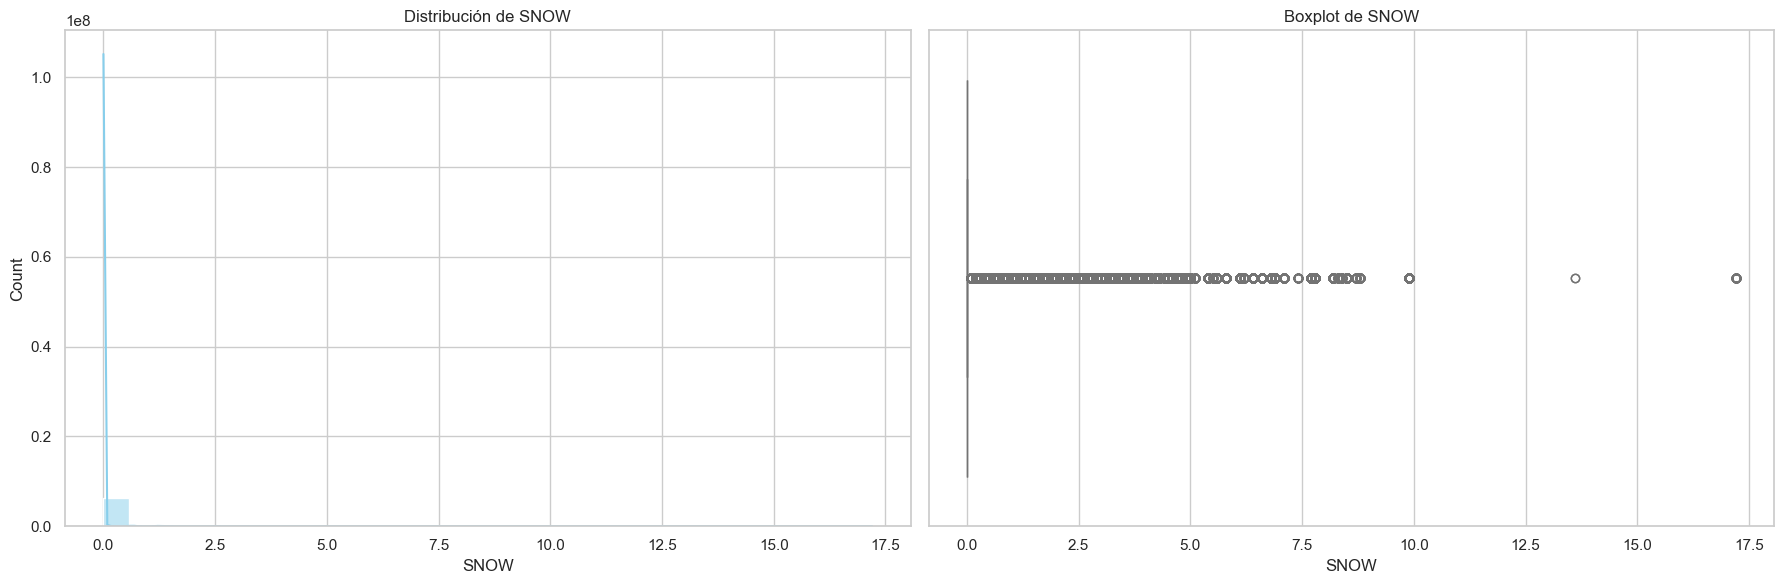


Outliers (IQR: 0.00):
- Valores < 0.00 o > 0.00
- Representan 2.5% de los datos



ANÁLISIS CONTINUO: SNWD


,count,mean,std,min,25%,50%,75%,max
SNWD,6489062.0,0.091524,0.728129,0.0,0.0,0.0,0.0,25.2


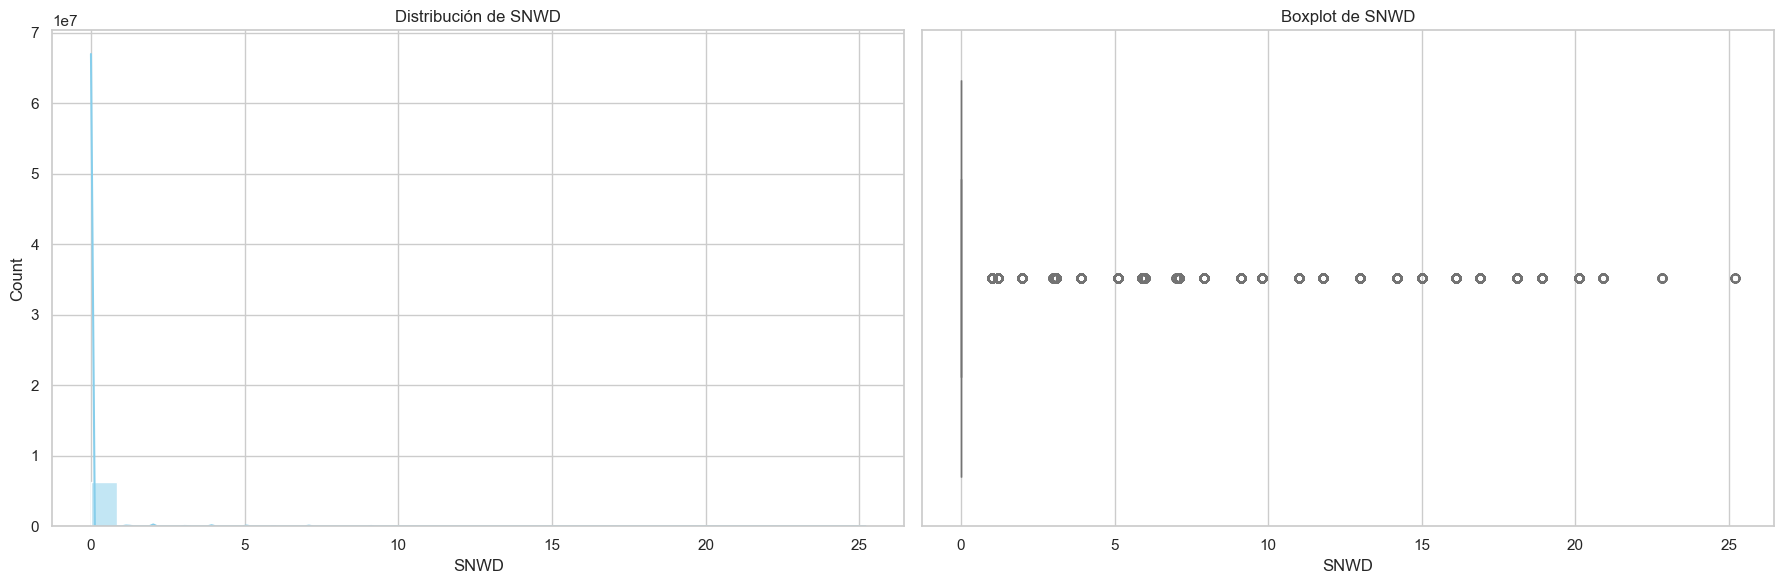


Outliers (IQR: 0.00):
- Valores < 0.00 o > 0.00
- Representan 2.7% de los datos



ANÁLISIS CONTINUO: TMAX


,count,mean,std,min,25%,50%,75%,max
TMAX,6489062.0,71.468462,18.353328,-10.0,59.0,74.0,86.0,115.0


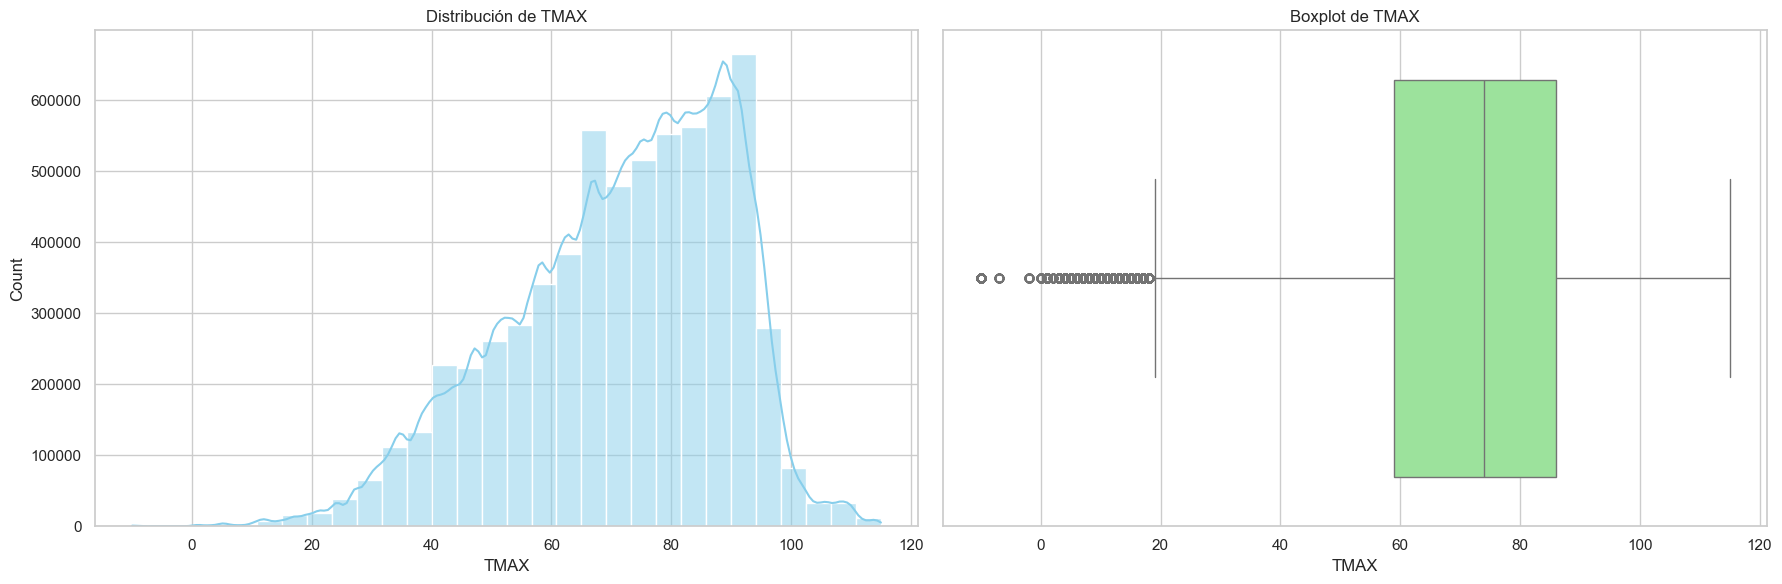


Outliers (IQR: 27.00):
- Valores < 18.50 o > 126.50
- Representan 0.4% de los datos



ANÁLISIS CONTINUO: AWND


,count,mean,std,min,25%,50%,75%,max
AWND,6489062.0,8.341329,3.607604,0.0,5.82,7.83,10.29,33.78


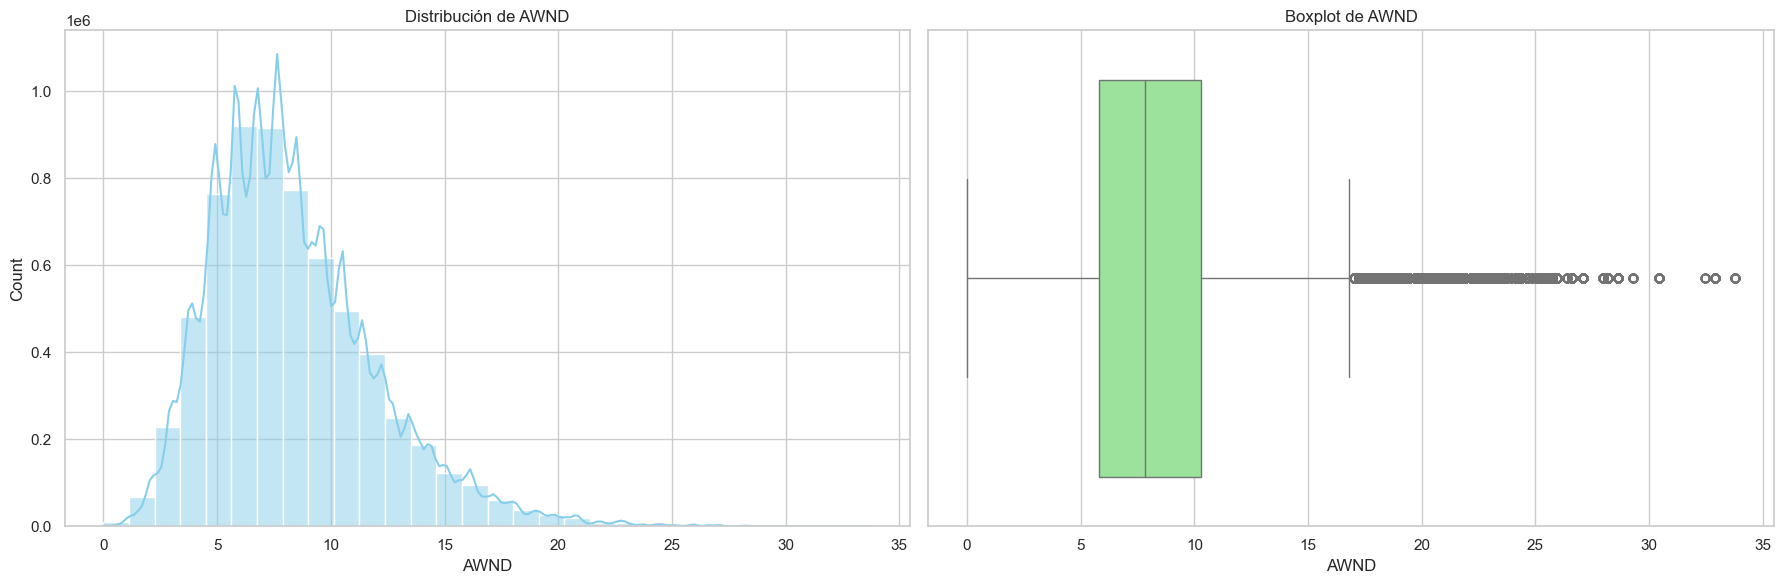


Outliers (IQR: 4.47):
- Valores < -0.88 o > 16.99
- Representan 2.6% de los datos




In [ ]:
# Análisis para variables continuas
for col in continuous_cols:
    print(f"\n{'='*50}")
    print(f"ANÁLISIS CONTINUO: {col.upper()}")
    print(f"{'='*50}")

    # Estadísticas
    display(df_sample[col].describe().to_frame().T)

    # Gráficos
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    sns.histplot(df_sample[col], bins=30, kde=True, ax=ax1, color='skyblue')
    ax1.set_title(f'Distribución de {col}')

    sns.boxplot(x=df_sample[col], ax=ax2, color='lightgreen')
    ax2.set_title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()

    # Outliers
    q1, q3 = df_sample[col].quantile([0.25, 0.75])
    iqr = q3 - q1

    # Outliers
    q1, q3 = df_sample[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    print(f"\nOutliers (IQR: {iqr:.2f}):")
    print(f"- Valores < {q1 - 1.5*iqr:.2f} o > {q3 + 1.5*iqr:.2f}")
    print(f"- Representan {((df_sample[col] < (q1 - 1.5*iqr)) | (df_sample[col] > (q3 + 1.5*iqr))).mean()*100:.1f}% de los datos")
    print(f"\n{'='*100}\n")

## Evaluación de hipótesis

### Hipótesis climática

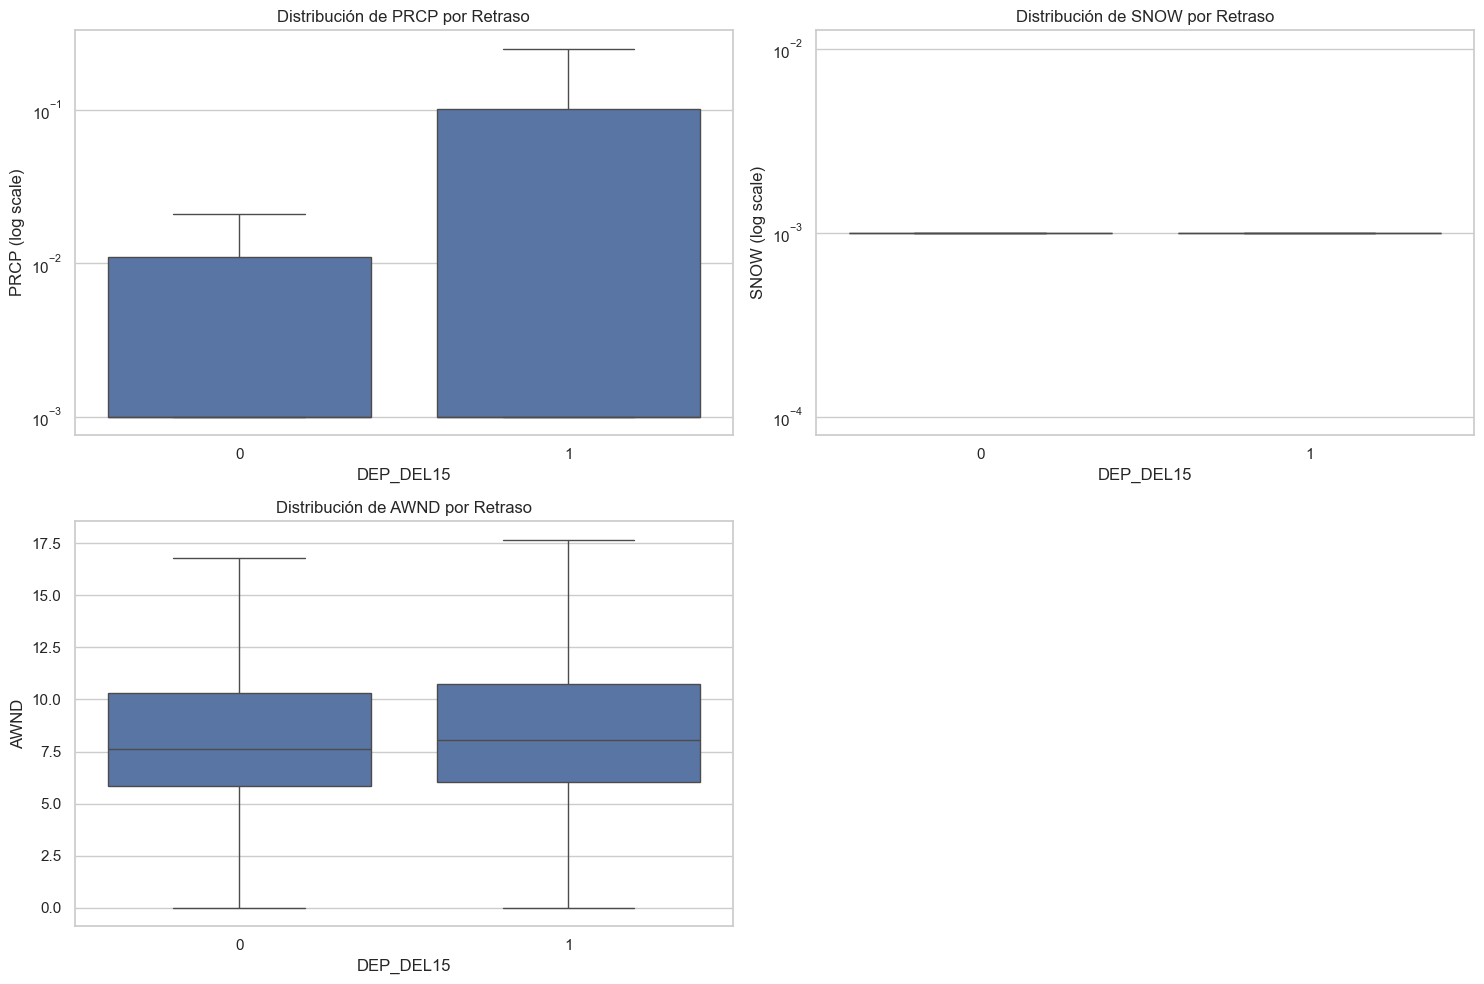


Análisis para PRCP:
- Mediana (Retrasados): 0.0000
- Mediana (Puntuales): 0.0000
- Diferencia: 0.0000 (↓)
- Test Mann-Whitney U: p-value = 0.000000
  → Efecto significativo (p < 0.05)

Análisis para SNOW:
- Mediana (Retrasados): 0.0000
- Mediana (Puntuales): 0.0000
- Diferencia: 0.0000 (↓)
- Test Mann-Whitney U: p-value = 0.000000
  → Efecto significativo (p < 0.05)

Análisis para AWND:
- Mediana (Retrasados): 8.0500
- Mediana (Puntuales): 7.6100
- Diferencia: 0.4400 (↑)
- Test Mann-Whitney U: p-value = 0.000000
  → Efecto significativo (p < 0.05)


In [ ]:
# Configuración mejorada
plt.figure(figsize=(15, 10))
weather_vars = ['PRCP', 'SNOW', 'AWND']
target = 'DEP_DEL15'

# Gráficos con manejo de zeros
for i, var in enumerate(weather_vars, 1):
    plt.subplot(2, 2, i)

    # Filtrar valores negativos y aplicar offset para log-scale
    plot_data = df_sample[(df_sample[var] >= 0)].copy()

    if var in ['PRCP', 'SNOW']:
        # Añadir pequeño offset (0.001) para evitar zeros
        plot_data[var] = plot_data[var] + 0.001
        sns.boxplot(data=plot_data, x=target, y=var, showfliers=False)
        plt.yscale('log')
        plt.ylabel(f'{var} (log scale)')
    else:
        sns.boxplot(data=plot_data, x=target, y=var, showfliers=False)

    plt.title(f'Distribución de {var} por Retraso')

# Ajustar layout
plt.tight_layout()
plt.show()

# Tests estadísticos mejorados
from scipy.stats import mannwhitneyu

for var in weather_vars:
    # Usar datos sin negativos
    clean_data = df_sample[df_sample[var] >= 0]
    delayed = clean_data[clean_data[target]==1][var]
    on_time = clean_data[clean_data[target]==0][var]

    # Calcular diferencia de medianas
    med_delayed = delayed.median()
    med_on_time = on_time.median()

    # Test estadístico
    stat, p = mannwhitneyu(delayed, on_time, alternative='greater')

    print(f"\nAnálisis para {var}:")
    print(f"- Mediana (Retrasados): {med_delayed:.4f}")
    print(f"- Mediana (Puntuales): {med_on_time:.4f}")
    print(f"- Diferencia: {med_delayed - med_on_time:.4f} ({'↑' if med_delayed > med_on_time else '↓'})")
    print(f"- Test Mann-Whitney U: p-value = {p:.6f}")
    print("  → Efecto significativo (p < 0.05)" if p < 0.05 else "  → No significativo")

Variables PRCP y SNOW:
- Mediana = 0 en ambos grupos indica que:
- Más del 50% de los vuelos ocurren sin precipitación/nieve
- Pero el test muestra significancia (p≈0) debido a:
 - Tamaño muestral enorme (6M+ registros)
 - Diferencias en valores extremos positivos (cola derecha de la distribución)

Variable AWND:
- Efecto real aunque pequeño: +0.44 mph en vientos para vuelos retrasados
- Significancia estadística ≠ Importancia práctica

### Hipótesis de congestión


Correlación Congestión-Retraso: 0.009 (p-value = 0.0000)
- Retrasos en percentil 75%: 19.1%
- Retrasos en percentil 90%: 19.1%
- Retrasos en percentil 95%: 18.5%


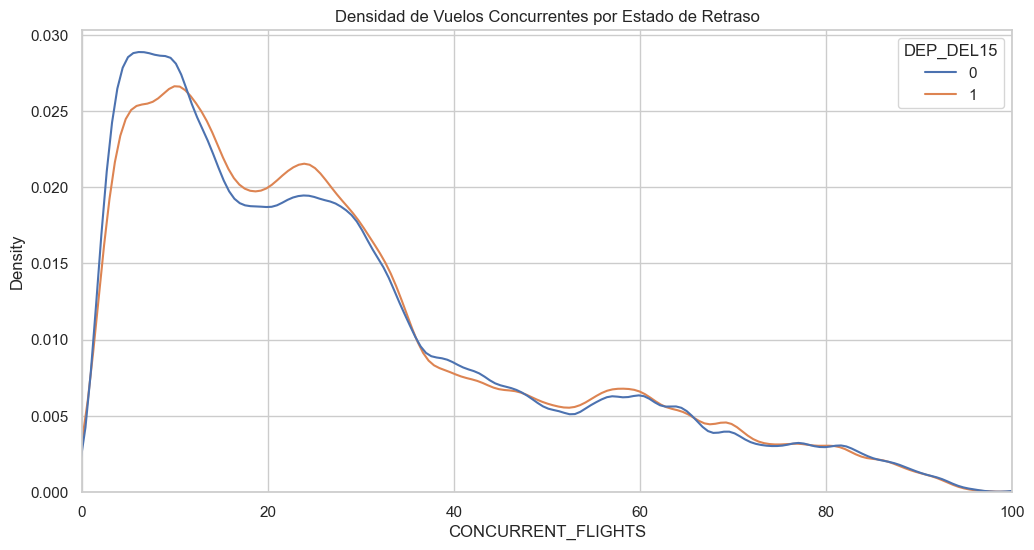

In [ ]:
# Análisis visual
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_sample, x='CONCURRENT_FLIGHTS', hue=target, common_norm=False)
plt.title('Densidad de Vuelos Concurrentes por Estado de Retraso')
plt.xlim(0, 100)

# Correlación punto-biserial
from scipy.stats import pointbiserialr
corr, p_val = pointbiserialr(df_sample['CONCURRENT_FLIGHTS'], df_sample[target])
print(f"\nCorrelación Congestión-Retraso: {corr:.3f} (p-value = {p_val:.4f})")

# Percentiles de congestión
for perc in [75, 90, 95]:
    threshold = df_sample['CONCURRENT_FLIGHTS'].quantile(perc/100)
    delay_rate = df_sample[df_sample['CONCURRENT_FLIGHTS'] > threshold][target].mean()
    print(f"- Retrasos en percentil {perc}%: {delay_rate*100:.1f}%")

Los resultados sobre la hipótesis de congestión revelan hallazgos contraintuitivos: no parecen correlacionar con la demora del vuelo

### Hipótesis de antigüedad

In [ ]:
from scipy.stats import kruskal

C:\Users\ext.jlopezsaez\AppData\Local\Temp\ipykernel_40984\3882173045.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_sample, x='PLANE_AGE_GROUP', y=target,
C:\Users\ext.jlopezsaez\AppData\Local\Temp\ipykernel_40984\3882173045.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['DEP_DEL15'] for _, group in df_sample.groupby('PLANE_AGE_GROUP')]



🔬 Resultados del Test Kruskal-Wallis:
- Estadístico H = 2801.9
- p-value = 0.0000
✅ Diferencias significativas entre grupos

📊 Tasa de retraso por grupo:


C:\Users\ext.jlopezsaez\AppData\Local\Temp\ipykernel_40984\3882173045.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df_sample.groupby('PLANE_AGE_GROUP')[target].mean().sort_values(ascending=False))


PLANE_AGE_GROUP
11-15    0.199198
6-10     0.197783
16-20    0.188543
20+      0.183099
0-5      0.178995
Name: DEP_DEL15, dtype: float64

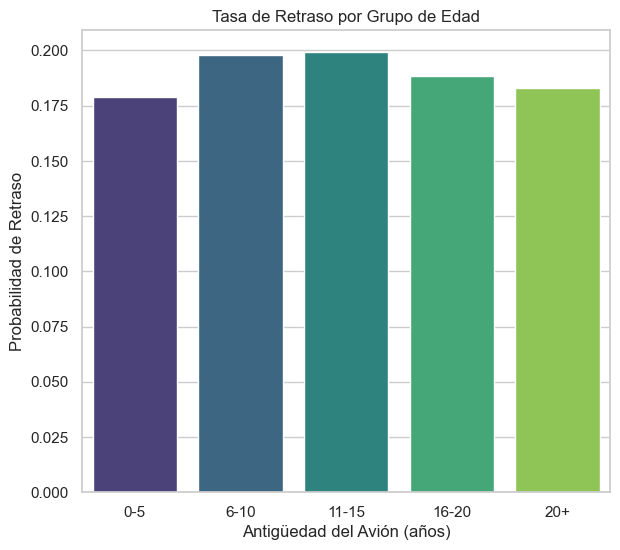

In [ ]:
# Configuración
plt.figure(figsize=(15, 6))
target = 'DEP_DEL15'

# Gráfico de barras por grupos de edad
plt.subplot(1, 2, 1)

# Crear grupos de edad (bins personalizables)
age_bins = [0, 5, 10, 15, 20, 30]  # Ajustar según distribución real
df_sample['PLANE_AGE_GROUP'] = pd.cut(df_sample['PLANE_AGE'],
                                     bins=age_bins,
                                     labels=['0-5', '6-10', '11-15', '16-20', '20+'])

sns.barplot(data=df_sample, x='PLANE_AGE_GROUP', y=target,
            estimator=np.mean, errorbar=None, palette='viridis')
plt.title('Tasa de Retraso por Grupo de Edad')
plt.xlabel('Antigüedad del Avión (años)')
plt.ylabel('Probabilidad de Retraso')


# Test estadístico robusto
# Kruskal-Wallis (no paramétrico para >2 grupos)
groups = [group['DEP_DEL15'] for _, group in df_sample.groupby('PLANE_AGE_GROUP')]
h_stat, p_val = kruskal(*groups)

print(f"\n🔬 Resultados del Test Kruskal-Wallis:")
print(f"- Estadístico H = {h_stat:.1f}")
print(f"- p-value = {p_val:.4f}")
print("✅ Diferencias significativas entre grupos" if p_val < 0.05 else "❌ No hay diferencias significativas")

# Efecto práctico por grupo
print("\n📊 Tasa de retraso por grupo:")
display(df_sample.groupby('PLANE_AGE_GROUP')[target].mean().sort_values(ascending=False))

- Diferencias significativas (p < 0.001): el test Kruskal-Wallis confirma que existen diferencias estadísticamente significativas en las tasas de retraso entre los grupos de antigüedad de aviones.
- Relación no monótona: la tasa de retraso no aumenta linealmente con la antigüedad, sino que muestra un pico en aviones de 11-15 años (19.9%), seguido por una disminución en aviones más viejos (20+: 18.3%).

### Hipótesis temporal


ANOVA Mensual: F = 3638.2, p-value = 0.0000
Hay diferencias significativas entre meses


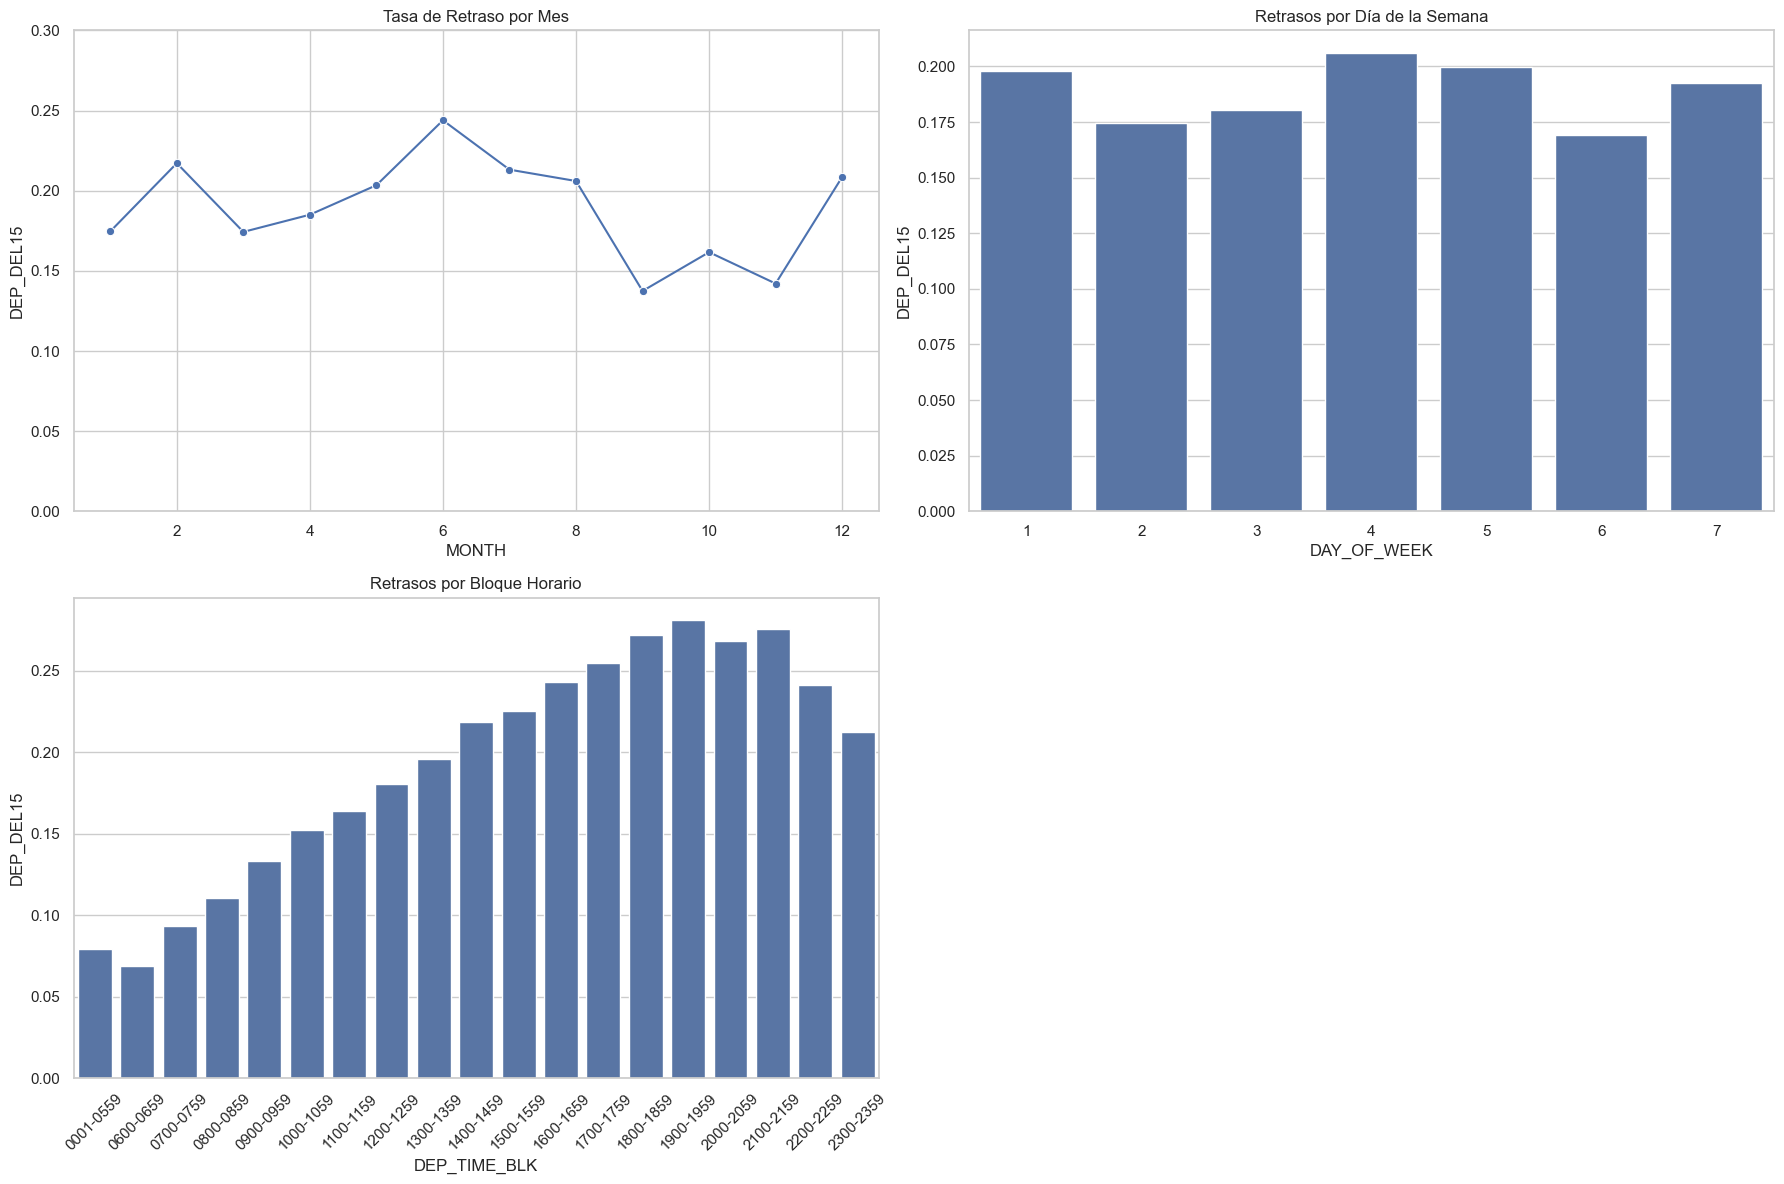

In [ ]:
# Configuración
plt.figure(figsize=(18, 12))

# Análisis mensual
plt.subplot(2, 2, 1)
monthly_delay = df_sample.groupby('MONTH')[target].mean().reset_index()
sns.lineplot(data=monthly_delay, x='MONTH', y=target, marker='o')
plt.title('Tasa de Retraso por Mes')
plt.ylim(0, 0.3)

# Análisis por día de la semana
plt.subplot(2, 2, 2)
dow_delay = df_sample.groupby('DAY_OF_WEEK')[target].mean().reset_index()
sns.barplot(data=dow_delay, x='DAY_OF_WEEK', y=target)
plt.title('Retrasos por Día de la Semana')

# Análisis por bloque horario
plt.subplot(2, 2, 3)
hourly_delay = df_sample.groupby('DEP_TIME_BLK')[target].mean().reset_index()
sns.barplot(data=hourly_delay, x='DEP_TIME_BLK', y=target)
plt.title('Retrasos por Bloque Horario')
plt.xticks(rotation=45)

# Test ANOVA
from scipy.stats import f_oneway
groups = [group[target].values for name, group in df_sample.groupby('MONTH')]
f_stat, p_val = f_oneway(*groups)
print(f"\nANOVA Mensual: F = {f_stat:.1f}, p-value = {p_val:.4f}")
print("Hay diferencias significativas entre meses" if p_val < 0.05 else "No hay diferencias entre meses")

plt.tight_layout()
plt.show()

Diferencias significativas entre meses (ANOVA: F = 3638.2, p < 0.001).

### Análisis de Outliers

In [ ]:
# Subset numéricas continuas
df_continuous = df_sample[continuous_cols].copy()
df_continuous.head()

,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,PRCP,SNOW,SNWD,TMAX,AWND
0,25,143,13056,107363,5873,1903352,13382999,0.000062,0.000099,8,0.0,0.0,0.0,65.0,2.91
1,29,191,13056,73508,1174,1903352,12460183,0.000144,0.000149,3,0.0,0.0,0.0,65.0,2.91
2,27,199,13056,73508,1174,1903352,12460183,0.000144,0.000149,18,0.0,0.0,0.0,65.0,2.91
3,27,180,13056,73508,1174,1903352,12460183,0.000144,0.000149,2,0.0,0.0,0.0,65.0,2.91
4,10,182,13056,15023,1257,1903352,2688839,0.000009,0.000125,1,0.0,0.0,0.0,65.0,2.91


In [ ]:
def calcular_outliers_iqr(df):
    """
    Calcula el porcentaje de outliers para las columnas numéricas de un DataFrame
    utilizando el criterio del rango intercuartílico (IQR), excluyendo variables binarias.

    Args:
        df (pd.DataFrame): DataFrame de entrada.

    Returns:
        pd.DataFrame: DataFrame con columnas numéricas y su porcentaje de outliers,
                      ordenadas en orden decreciente.
    """
    resultados = []

    for columna in df.select_dtypes(include='number').columns:
        # Excluir variables binarias
        if df[columna].nunique() == 2:
            continue

        q1 = df[columna].quantile(0.25)
        q3 = df[columna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        # Calcular el porcentaje de outliers
        outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        porcentaje_outliers = (len(outliers) / len(df)) * 100
        resultados.append((columna, porcentaje_outliers))

    # Convertir a DataFrame y ordenar por porcentaje de outliers
    outliers_df = pd.DataFrame(resultados, columns=['Columna', 'Porcentaje_Outliers'])
    outliers_df = outliers_df[outliers_df['Porcentaje_Outliers'] > 0]
    outliers_df = outliers_df.sort_values(by='Porcentaje_Outliers', ascending=False).reset_index(drop=True)

    return outliers_df

In [ ]:
calcular_outliers_iqr(df_continuous)

,Columna,Porcentaje_Outliers
0,PRCP,20.786502
1,AVG_MONTHLY_PASS_AIRPORT,6.050227
2,AIRLINE_AIRPORT_FLIGHTS_MONTH,5.901284
3,FLT_ATTENDANTS_PER_PASS,3.525810
4,SNWD,2.660955
5,AWND,2.563699
6,SNOW,2.500623
7,CONCURRENT_FLIGHTS,2.353977
8,TMAX,0.383538
9,NUMBER_OF_SEATS,0.039621


In [ ]:
def plot_boxplot_outliers(df, columnas_outliers):
    """
    Genera un gráfico boxplot vertical de las variables con outliers,
    normalizando previamente los datos con RobustScaler.

    Args:
        df (pd.DataFrame): DataFrame con los datos.
        outlier_columns (list): Lista de columnas con outliers.

    Returns:
        None
    """
    # Normalizá las columnas con outliers
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[columnas_outliers] = scaler.fit_transform(df[columnas_outliers])

    # Configuración del gráfico
    plt.figure(figsize=(len(columnas_outliers) * 2, 10))
    sns.boxplot(data=df_normalized[columnas_outliers], orient='v')

    # Ajustes finales del gráfico
    plt.title('Boxplot de Variables con Outliers (Normalizadas)', fontsize=14)
    plt.ylabel('Valor Normalizado', fontsize=12)
    plt.xlabel('Variables', fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
outliers_df = calcular_outliers_iqr(df_continuous)

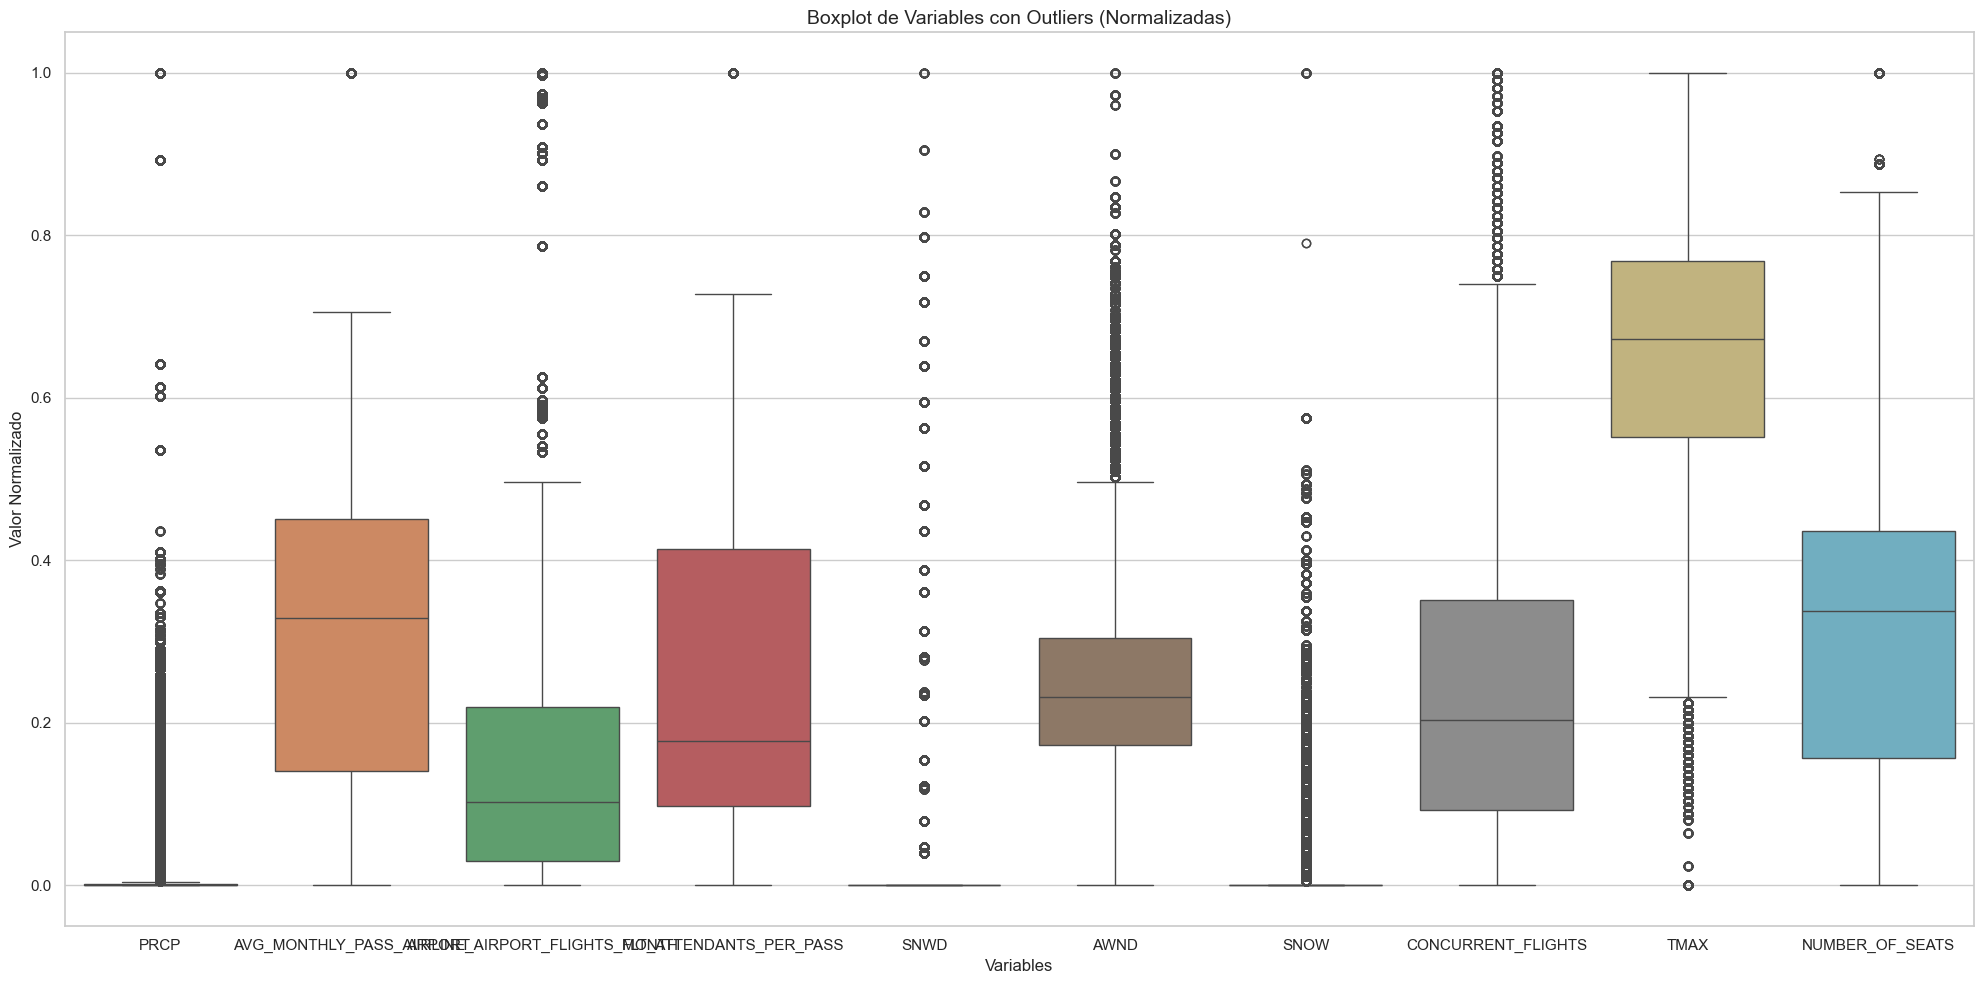

In [ ]:
columnas_outliers = outliers_df['Columna'].tolist()
plot_boxplot_outliers(df, columnas_outliers)

In [ ]:
def analizar_remocion_outliers(data, columnas_outliers, target ='Status'):
    """
    Analiza el impacto de eliminar los outliers en el tamaño del dataset y
    la distribución de una columna de estado antes y después de la eliminación.

    Parámetros:
        data (pd.DataFrame): El DataFrame de entrada.
        columnas_outliers (list): Lista con los nombres de las columnas con outliers.
        columna_status (str): Nombre de la columna de estado a analizar (por defecto 'Status').

    Devuelve:
        pd.DataFrame: Un resumen con la distribución de `columna_status` antes y después de eliminar outliers.
    """
    # Calcular los límites del IQR para las columnas con outliers
    q1 = data[columnas_outliers].quantile(0.25)
    q3 = data[columnas_outliers].quantile(0.75)
    iqr = q3 - q1

    # Definir los límites inferior y superior para los outliers
    limite_inferior = q1 - 1.5 * iqr
    limite_superior = q3 + 1.5 * iqr

    # Filtrar filas que no tengan outliers en las columnas especificadas
    sin_outliers = data[
        ~((data[columnas_outliers] < limite_inferior) | (data[columnas_outliers] > limite_superior)).any(axis=1)
    ]

    # Calcular el porcentaje de registros restantes
    porcentaje_restante = len(sin_outliers) / len(data) * 100

    # Calcular la distribución de la columna de estado antes y después de la eliminación
    distribucion_original = data[target].value_counts(normalize=True) * 100
    distribucion_filtrada = sin_outliers[target].value_counts(normalize=True) * 100

    # Crear un DataFrame resumen
    resumen = pd.DataFrame({
        'Distribución Original (%)': distribucion_original,
        'Distribución Filtrada (%)': distribucion_filtrada,
    }).fillna(0)

    # Imprimir resultados
    print(f"Porcentaje restante del dataset después de eliminar outliers: {porcentaje_restante:.2f}%\n")
    print("Distribución de la columna de estado (antes y después de eliminar outliers):\n")
    print(resumen)

In [ ]:
analizar_remocion_outliers(df, columnas_outliers, target ='DEP_DEL15')

Porcentaje restante del dataset después de eliminar outliers: 65.99%

Distribución de la columna de estado (antes y después de eliminar outliers):

           Distribución Original (%)  Distribución Filtrada (%)
DEP_DEL15                                                      
0                          81.085587                  83.182896
1                          18.914413                  16.817104


### Análisis de valores nulos

In [ ]:
def calcular_porcentaje_nulos(df):
    """
    Calcula el porcentaje de valores nulos por columna y devuelve las columnas
    con valores nulos en orden decreciente según el porcentaje.

    Args:
    df (pd.DataFrame): DataFrame a analizar.

    Returns:
    pd.DataFrame: DataFrame con columnas `columna` y `porcentaje_nulos`.
    """
    # Calcular porcentaje de nulos
    porcentaje_nulos = df.isnull().mean() * 100

    # Filtrar columnas con nulos y ordenar en orden decreciente
    nulos_df = (porcentaje_nulos[porcentaje_nulos > 0]
                .sort_values(ascending=False)
                .reset_index())
    nulos_df.columns = ['columna', 'porcentaje_nulos']

    return nulos_df

In [ ]:
calcular_porcentaje_nulos(df)

,columna,porcentaje_nulos


In [ ]:
def imputar_valores_nulos(data, columnas_outliers):
    """
    Imputa los valores nulos en el DataFrame según las reglas especificadas:
    - Para las variables numéricas:
        - Si no tiene outliers, se imputa con la media.
        - Si tiene outliers, se imputa con la mediana.
    - Para las variables categóricas, se imputa con la moda.

    Parámetros:
        data (pd.DataFrame): El DataFrame de entrada con los valores nulos.
        columnas_outliers (list): Lista con los nombres de las columnas con outliers.

    Devuelve:
        pd.DataFrame: El DataFrame con los valores nulos imputados.
    """
    for col in data.columns:
        if data[col].dtype == 'object':  # Categóricas
            # Imputar con la moda para columnas categóricas
            moda = data[col].mode()[0]
            data[col] = data[col].fillna(moda)

        else:  # Numéricas
            if col in columnas_outliers:
                # Imputar con la mediana si la columna tiene outliers
                mediana = data[col].median()
                data[col] = data[col].fillna(mediana)
            else:
                # Imputar con la media si la columna no tiene outliers
                media = data[col].mean()
                data[col] = data[col].fillna(media)

    return data

In [ ]:
df = imputar_valores_nulos(df, columnas_outliers)

## Preprocesamiento de Datos

### Variable estación del año

In [ ]:
# Definir función para categorizar estación en base a latitud y mes
def determinar_estacion(lat, mes):
    if lat >= 0:  # Hemisferio Norte
        if mes in [6, 7, 8]:
            return 1  # Verano
        elif mes in [9, 10, 11]:
            return 2  # Otoño
        elif mes in [12, 1, 2]:
            return 3  # Invierno
        else:
            return 4  # Primavera
    else:  # Hemisferio Sur
        if mes in [12, 1, 2]:
            return 1  # Verano
        elif mes in [3, 4, 5]:
            return 2  # Otoño
        elif mes in [6, 7, 8]:
            return 3  # Invierno
        else:
            return 4  # Primavera

In [ ]:
# Crear columna 'SEASON' aplicando la función a cada fila
df['SEASON'] = np.vectorize(determinar_estacion)(df['LATITUDE'], df['MONTH'])

### Temperatura expresada en Kelvin (medida absoluta)

In [ ]:
# Convertir TMAX de Fahrenheit a Kelvin
df['TMAX_K'] = (df['TMAX'] - 32) * 5 / 9 + 273.15

# Eliminar la columna TMAX original
df.drop(columns=['TMAX'], inplace=True)

### Conversión del horario de partida

In [ ]:
# Diccionario de mapeo de bloques de tiempo a hora de partida (0-23)
time_block_to_hour = {
    '0001-0559': 0,
    '0600-0659': 6,
    '0700-0759': 7,
    '0800-0859': 8,
    '0900-0959': 9,
    '1000-1059': 10,
    '1100-1159': 11,
    '1200-1259': 12,
    '1300-1359': 13,
    '1400-1459': 14,
    '1500-1559': 15,
    '1600-1659': 16,
    '1700-1759': 17,
    '1800-1859': 18,
    '1900-1959': 19,
    '2000-2059': 20,
    '2100-2159': 21,
    '2200-2259': 22,
    '2300-2359': 23
}

# Reemplazo de los valores en la columna 'DEP_TIME_BLK' con el mapeo correspondiente
df['DEP_TIME_BLK'] = df['DEP_TIME_BLK'].map(time_block_to_hour)

### Encoding de variables categóricas

#### CARRIER NAME

In [ ]:
# Paso 1: One Hot Encoding de CARRIER_NAME
df = pd.get_dummies(df, columns=['CARRIER_NAME'], drop_first=True)

# Convertir los valores True/False a 1/0
df = df.astype({col: 'int' for col in df.columns if col.startswith('CARRIER_NAME')})

In [ ]:
df.head().T

,0,1,2,3,4
MONTH,1,1,1,1,1
DAY_OF_WEEK,7,7,7,7,7
DEP_DEL15,0,0,0,0,0
DEP_TIME_BLK,8,7,6,6,0
DISTANCE_GROUP,2,7,7,9,7
SEGMENT_NUMBER,1,1,1,1,1
CONCURRENT_FLIGHTS,25,29,27,27,10
NUMBER_OF_SEATS,143,191,199,180,182
AIRPORT_FLIGHTS_MONTH,13056,13056,13056,13056,13056
AIRLINE_FLIGHTS_MONTH,107363,73508,73508,73508,15023


#### DEPARTING y PREVIOUS AIRPORT

In [ ]:
# Paso 1: Combinamos las dos columnas para entrenar el encoder
all_airports = pd.concat([df['DEPARTING_AIRPORT'], df['PREVIOUS_AIRPORT']])

# Paso 2: Creamos el LabelEncoder y lo entrenamos con todos los valores posibles
airport_encoder = LabelEncoder()
airport_encoder.fit(all_airports)

# Paso 3: Aplicamos el encoding a ambas columnas
df['DEPARTING_AIRPORT'] = airport_encoder.transform(df['DEPARTING_AIRPORT'])
df['PREVIOUS_AIRPORT'] = airport_encoder.transform(df['PREVIOUS_AIRPORT'])

### Escalamiento de variables numéricas

In [ ]:
# Lista de variables numéricas para escalar
numerical_columns_to_scale = [
    'DISTANCE_GROUP', 'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
    'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
    'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
    'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'LATITUDE', 'LONGITUDE', 'PRCP', 'SNOW',
    'SNWD', 'TMAX_K', 'AWND', 'SEASON', 'DEP_TIME_BLK'
]

# Inicializar los escaladores
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Iterar sobre las columnas numéricas y aplicar el escalado apropiado
for col in numerical_columns_to_scale:
    # Calcular skewness de la columna
    skewness = skew(df[col].dropna())  # Ignorar valores NaN si los hay

    # Escalar dependiendo del skewness
    if abs(skewness) > 1:
        # Si el skewness es alto, usamos MinMaxScaler
        df[col] = minmax_scaler.fit_transform(df[[col]])
    else:
        # Si el skewness es bajo, usamos StandardScaler
        df[col] = standard_scaler.fit_transform(df[[col]])

In [ ]:
df.head().T

,0,1,2,3,4
MONTH,1.000000,1.000000,1.000000,1.000000,1.000000
DAY_OF_WEEK,7.000000,7.000000,7.000000,7.000000,7.000000
DEP_DEL15,0.000000,0.000000,0.000000,0.000000,0.000000
DEP_TIME_BLK,-0.990910,-1.185848,-1.380786,-1.380786,-2.550413
DISTANCE_GROUP,0.100000,0.600000,0.600000,0.800000,0.600000
SEGMENT_NUMBER,-1.164419,-1.164419,-1.164419,-1.164419,-1.164419
CONCURRENT_FLIGHTS,0.222222,0.259259,0.240741,0.240741,0.083333
NUMBER_OF_SEATS,0.199351,1.232673,1.404893,0.995870,1.038925
AIRPORT_FLIGHTS_MONTH,0.042017,0.042017,0.042017,0.042017,0.042017
AIRLINE_FLIGHTS_MONTH,1.291435,0.306770,0.306770,0.306770,-1.394255


## Construcción de Modelos

In [ ]:
semilla = 142857

In [ ]:
# Separación de features (X) y target (y)
X = df.drop(columns=['DEP_DEL15'])  # Todas las columnas excepto la target
y = df['DEP_DEL15']                 # Columna target

# Split 70/30 sin balanceo
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=semilla,
    stratify=y
)

# Verificación de tamaños y balance
print(f"\n📊 Distribución Original (y_train):")
print(y_train.value_counts(normalize=True).apply(lambda x: f"{x*100:.1f}%"))

print(f"\n🔍 Tamaños Finales:")
print(f"- X_train: {X_train.shape}")
print(f"- X_test: {X_test.shape}")
print(f"- y_train: {y_train.shape} (Clase 0: {(y_train == 0).sum()}, Clase 1: {(y_train == 1).sum()})")
print(f"- y_test: {y_test.shape}")


📊 Distribución Original (y_train):
DEP_DEL15
0    81.1%
1    18.9%
Name: proportion, dtype: object

🔍 Tamaños Finales:
- X_train: (4542343, 41)
- X_test: (1946719, 41)
- y_train: (4542343,) (Clase 0: 3683185, Clase 1: 859158)
- y_test: (1946719,)


In [ ]:
# Creo DF para ir guardando los resultados
column_names = ["Modelo", "Accuracy", "Precision", "Recall", "ROCAUC", "F1-Score", "Tiempo"]
resultados_df = pd.DataFrame(columns=column_names)

In [ ]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):
    # Aquí calculamos las métricas de evaluación del modelo
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    rocauc = roc_auc_score(y_test, y_pred)

    # Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'ROCAUC': [rocauc],
        'F1-Score': [f1],
        'Tiempo': [tiempo_ejecucion]
    }

    # Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

    return resultados_df

In [ ]:
def matriz_confusion(y_test, y_pred):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Matriz de confusión sin normalizar
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix,
                xticklabels=['En horario (P)', 'Retrasado (P)'],
                yticklabels=['En horario', 'Retrasado'],
                annot=True, fmt='d',
                ax=ax[0],
                square=True, linewidth=1)
    ax[0].set_title('Sin Normalizar')
    ax[0].set_xlabel('Predicción')
    ax[0].set_ylabel('Clase Verdadera')

    # Matriz de confusión normalizada
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum()
    sns.heatmap(conf_matrix_norm,
                xticklabels=['En horario (P)', 'Retrasado (P)'],
                yticklabels=['En horario', 'Retrasado'],
                annot=True, fmt='.2%',
                ax=ax[1],
                square=True, linewidth=1)
    ax[1].set_title('Normalizada')
    ax[1].set_xlabel('Predicción')
    ax[1].set_ylabel('Clase Verdadera')

    # Título general
    plt.suptitle('Matriz de Confusión')
    plt.show()

In [ ]:
# Función para entrenar el modelo, guardar métricas y mostrar matriz de confusión
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test, tf=False):
    # Entrenamos el modelo y medimos el tiempo de ejecución
    start = time.time()
    if tf:
        modelo.fit(X_train, y_train)
    else:
        modelo = modelo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Predecimos
    y_pred = modelo.predict(X_test) if not tf else np.where(modelo.predict(X_test) > 0.5, 1, 0)
    print(y_pred)
    print(y_pred.shape)

    # Guardamos los resultados en el DataFrame
    resultados = guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    # Usamos pd.concat en lugar de append
    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)

    # Mostramos los resultados de este modelo
    print("Resultados para el modelo:", nombre_modelo)
    print(resultados)

    # Mostramos la matriz de confusión
    matriz_confusion(y_test, y_pred)

### Árbol de decisión

In [ ]:
modelo = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,
    random_state = semilla)

[0 0 0 ... 0 0 0]
(1946719,)


C:\Users\ext.jlopezsaez\AppData\Local\Temp\ipykernel_40984\3952551434.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)


Resultados para el modelo: Árbol de decisión
              Modelo  Accuracy  Precision    Recall    ROCAUC  F1-Score  \
0  Árbol de decisión  0.811947   0.740816  0.008873  0.504074  0.017535   

      Tiempo  
0  20.086812  


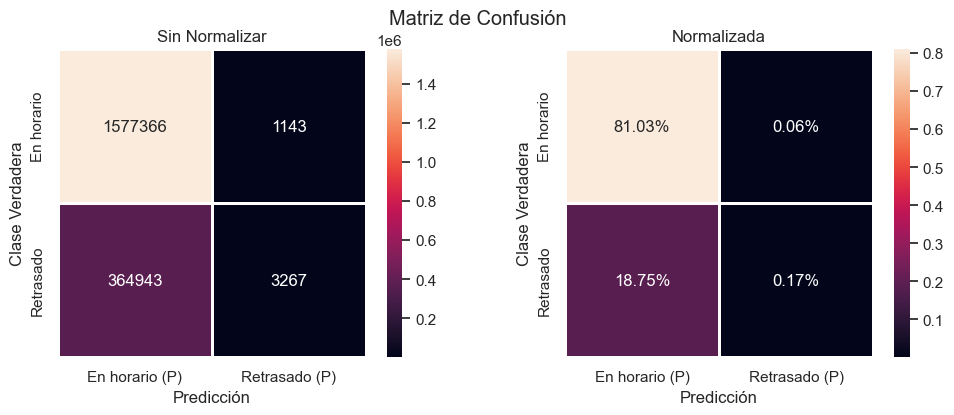

In [ ]:
entrenar_modelo(modelo, 'Árbol de decisión', X_train, y_train, X_test, y_test)

### Regresión Logística

In [ ]:
modelo = LogisticRegression(
    solver='liblinear',
    random_state=semilla)

[0 0 0 ... 0 0 0]
(1946719,)
Resultados para el modelo: Regresión Logística
                Modelo  Accuracy  Precision    Recall    ROCAUC  F1-Score  \
0  Regresión Logística  0.811109    0.53274  0.010893  0.504332   0.02135   

       Tiempo  
0  109.580046  


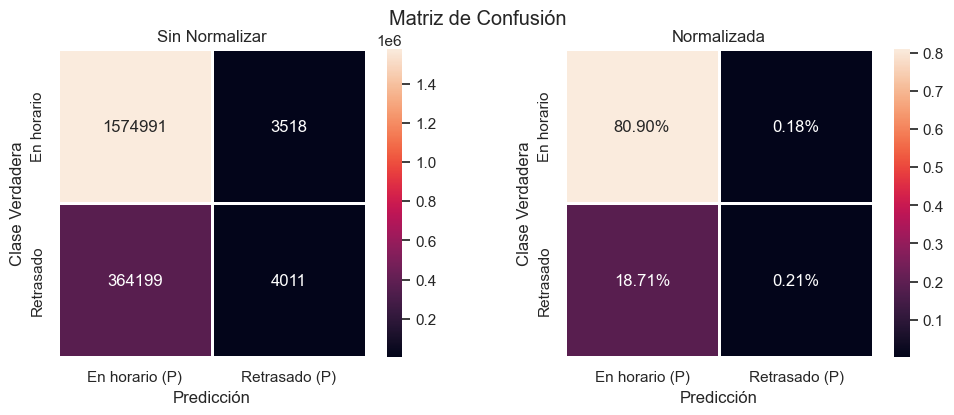

In [ ]:
entrenar_modelo(modelo, 'Regresión Logística', X_train, y_train, X_test, y_test)

### Random Forest

In [ ]:
modelo = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=semilla,
    class_weight='balanced'
)

[0 0 0 ... 0 1 1]
(1946719,)
Resultados para el modelo: Random Forest
          Modelo  Accuracy  Precision  Recall    ROCAUC  F1-Score      Tiempo
0  Random Forest  0.626597    0.28776  0.6604  0.639556  0.400853  588.221857


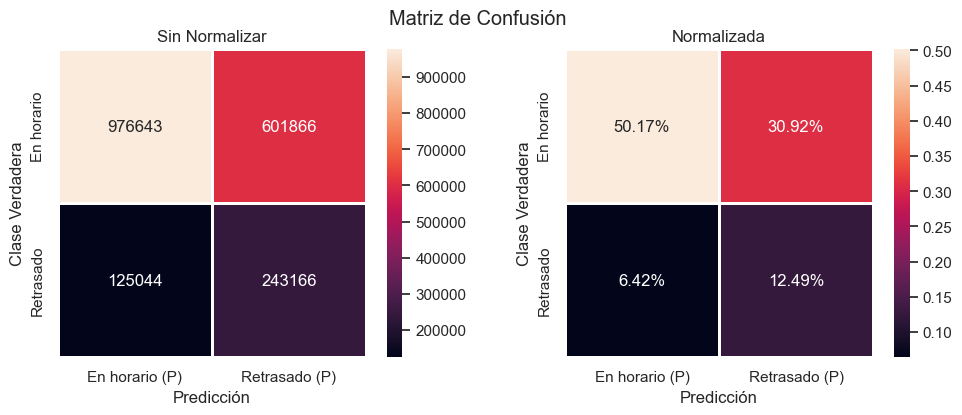

In [ ]:
entrenar_modelo(modelo, 'Random Forest', X_train, y_train, X_test, y_test)

### XGBoost

In [ ]:
modelo = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

[0 0 0 ... 0 0 0]
(1946719,)
Resultados para el modelo: XGBoost
    Modelo  Accuracy  Precision    Recall    ROCAUC  F1-Score     Tiempo
0  XGBoost  0.819098   0.687428  0.079911  0.535718  0.143178  15.399242


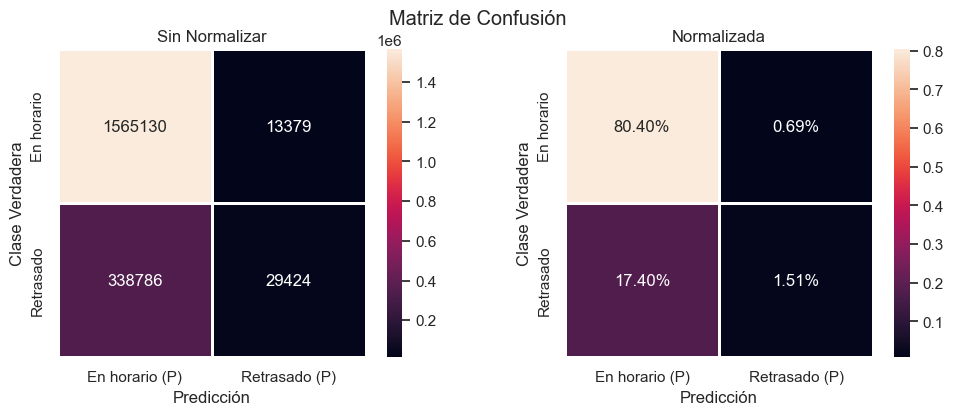

In [ ]:
entrenar_modelo(modelo, 'XGBoost', X_train, y_train, X_test, y_test)

## Conclusiones

In [ ]:
resultados_df.sort_values(by='ROCAUC', ascending=False)

,Modelo,Accuracy,Precision,Recall,ROCAUC,F1-Score,Tiempo
2,Random Forest,0.626597,0.287760,0.660400,0.639556,0.400853,588.221857
3,XGBoost,0.819098,0.687428,0.079911,0.535718,0.143178,15.399242
1,Regresión Logística,0.811109,0.532740,0.010893,0.504332,0.021350,109.580046
0,Árbol de decisión,0.811947,0.740816,0.008873,0.504074,0.017535,20.086812


### 📊 Análisis de Resultados y Plan de Mejora

#### 🔍 Hallazgos Clave
1. **Random Forest** tiene el mejor recall (66%) pero baja precisión (28.8%)
2. **XGBoost y Regresión Logística** tienen buen accuracy (~81%) pero recall muy bajo (<10%)
3. **Árbol de Decisión** muestra signos de overfitting

#### 🚀 Plan de Acción

##### 1️⃣ Manejo del Desbalance
- [ ] Aplicar class_weight='balanced'
- [ ] Evaluar técnicas de sampling (SMOTE, RandomUnderSampler)
- [ ] Probar enfoques de ensemble como BalancedRandomForest

##### 2️⃣ Optimización de Modelos
| Modelo          | Parámetros a Ajustar         | Métrica Objetivo |
|-----------------|------------------------------|------------------|
| Random Forest   | max_depth, n_estimators      | Recall           |
| XGBoost         | scale_pos_weight, max_depth  | F2-Score         |
| Regresión Log.  | class_weight, penalty        | Recall           |

##### 3️⃣ Ingeniería de Features
- [ ] Crear interacciones entre clima y congestión
- [ ] Discretizar variables continuas
- [ ] Analizar correlaciones con matriz de calor